# Analyse et Prédiction du Risque de Diabète

* Les installations :

* Les imports : 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from viz import visualization
from iqr import detecte_outliers_with_iqr
from zscore import detect_outliers_z_score
from knn import knn_imputation, knn_imputation_without_standarisation

from sklearn.preprocessing import RobustScaler
from scipy.stats.mstats import winsorize
from zscore import detect_remote_outliers_z_score


* Importer dataset :

In [2]:
dataset = pd.read_csv("dataset-diabete.csv")
print(f"dataset : \n{dataset}")

dataset : 
     Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0             0            6      148             72             35        0   
1             1            1       85             66             29        0   
2             2            8      183             64              0        0   
3             3            1       89             66             23       94   
4             4            0      137             40             35      168   
..          ...          ...      ...            ...            ...      ...   
763         763           10      101             76             48      180   
764         764            2      122             70             27        0   
765         765            5      121             72             23      112   
766         766            1      126             60              0        0   
767         767            1       93             70             31        0   

      BMI  DiabetesPedigreeF

## 🎯 Prétraitement des données - Gestion des valeurs manquantes et aberrantes

### 1️⃣ Identifier et traiter les valeurs manquantes dans le jeu de données si elles existent.

*️⃣ utiliser La standarisation Avant knn : 

In [3]:
print("******************** Avant : is null : ****************************** \n", dataset.isnull().sum())
dataset.describe()

******************** Avant : is null : ****************************** 
 Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,191.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,383.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,575.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [4]:
dataset_1 = knn_imputation(dataset)
print("******************** Après : is null : ****************************** \n", dataset_1.isnull().sum())
dataset_1.describe()

******************** Après : is null : ****************************** 
 Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,121.583594,72.289062,28.975260,154.781510,32.404375,0.471876,33.240885
std,221.846794,3.369578,30.497521,12.196650,9.446136,97.969796,6.896876,0.331329,11.760232
min,0.000000,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,191.750000,1.000000,99.000000,64.000000,22.400000,88.950000,27.400000,0.243750,24.000000
50%,383.500000,3.000000,117.000000,72.000000,29.000000,134.100000,32.050000,0.372500,29.000000
75%,575.250000,6.000000,140.250000,80.000000,35.000000,191.050000,36.600000,0.626250,41.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


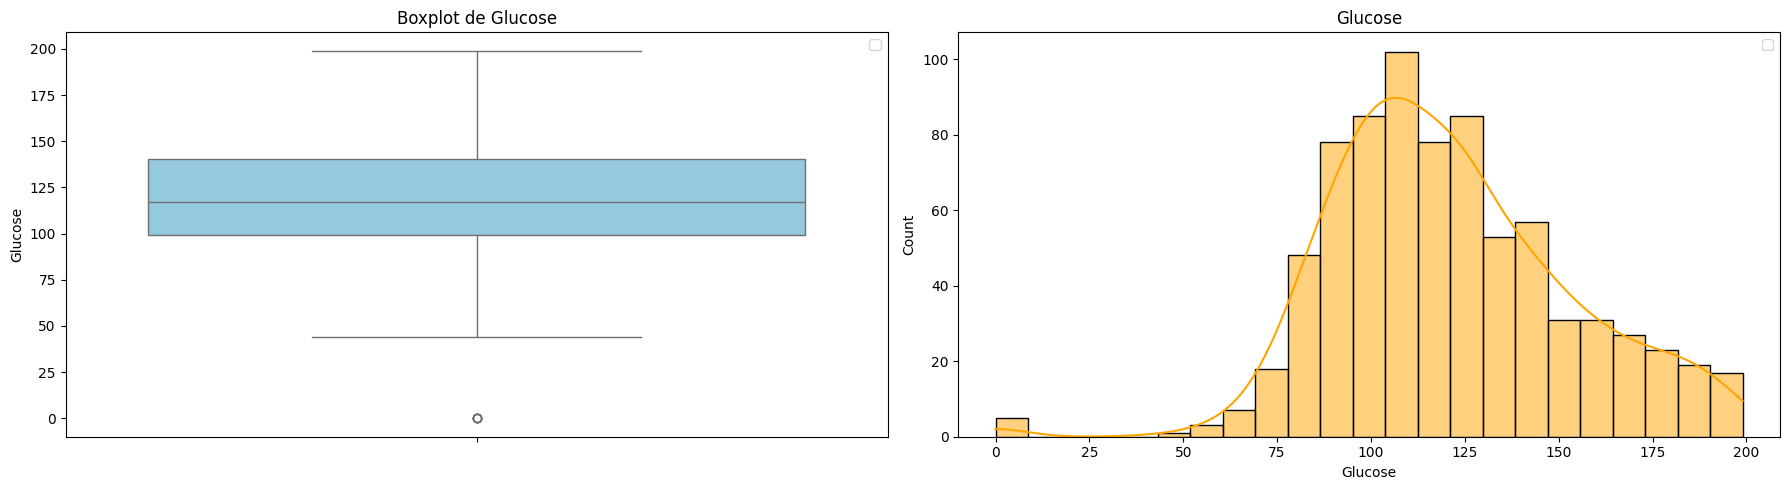

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


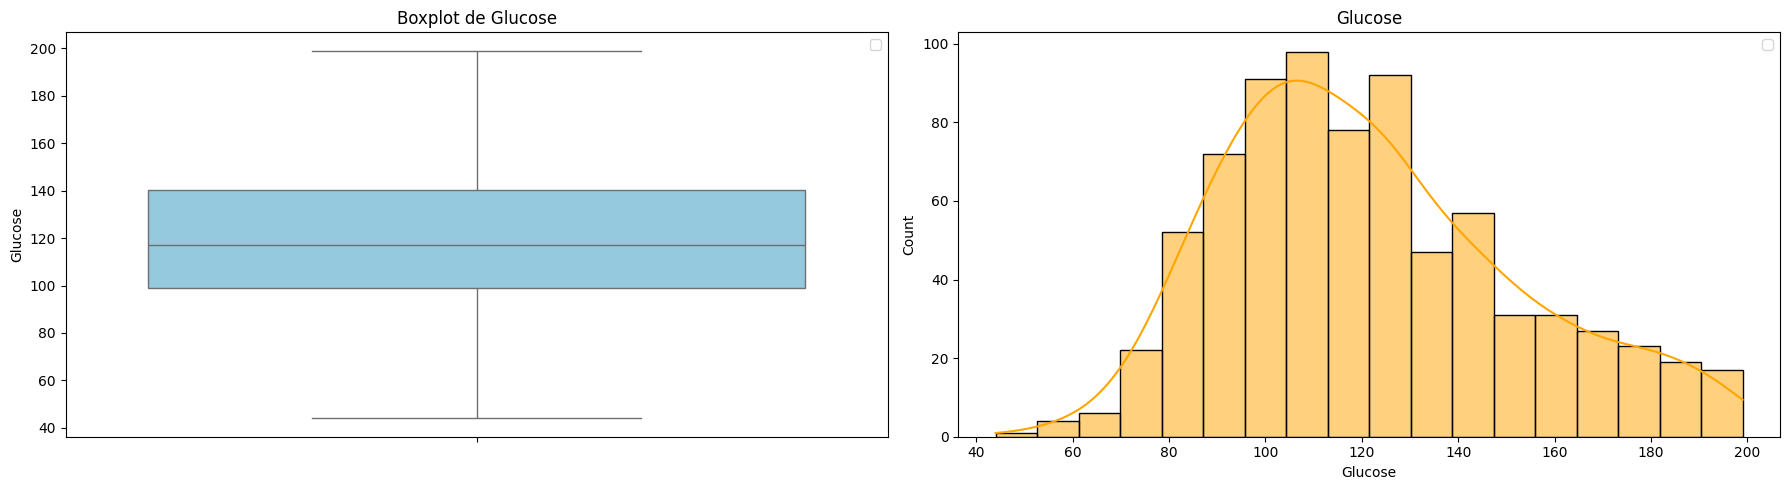

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


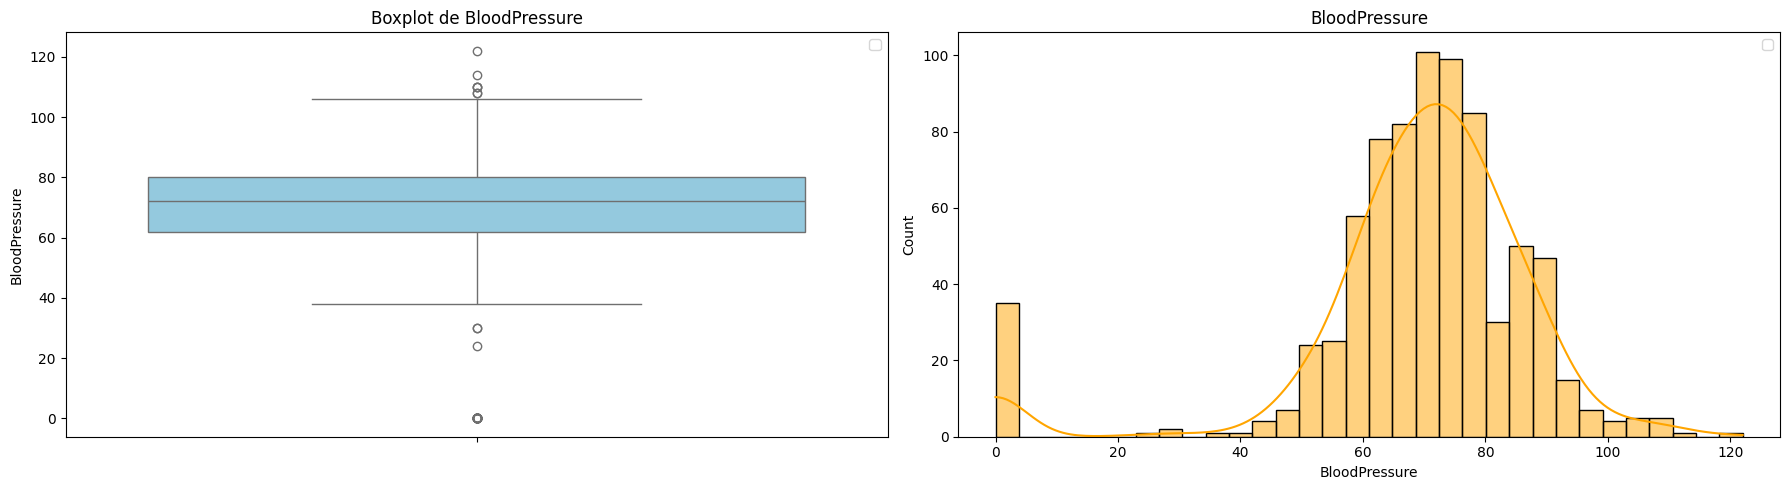

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


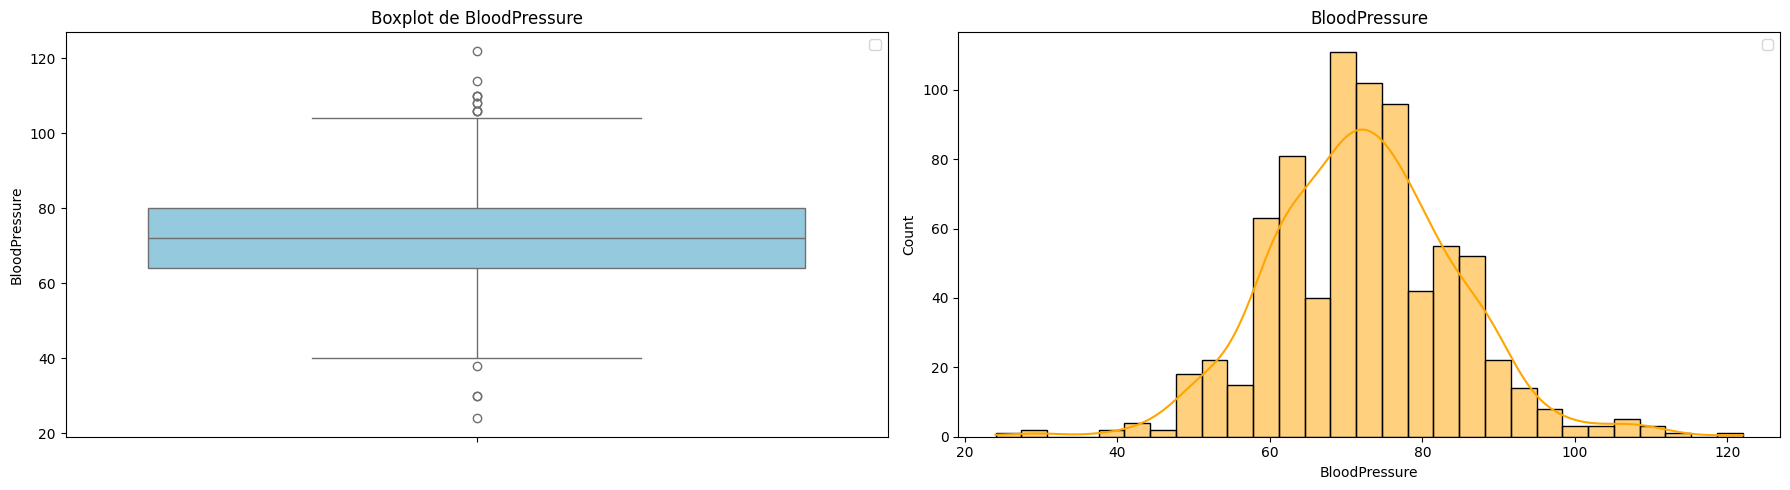

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


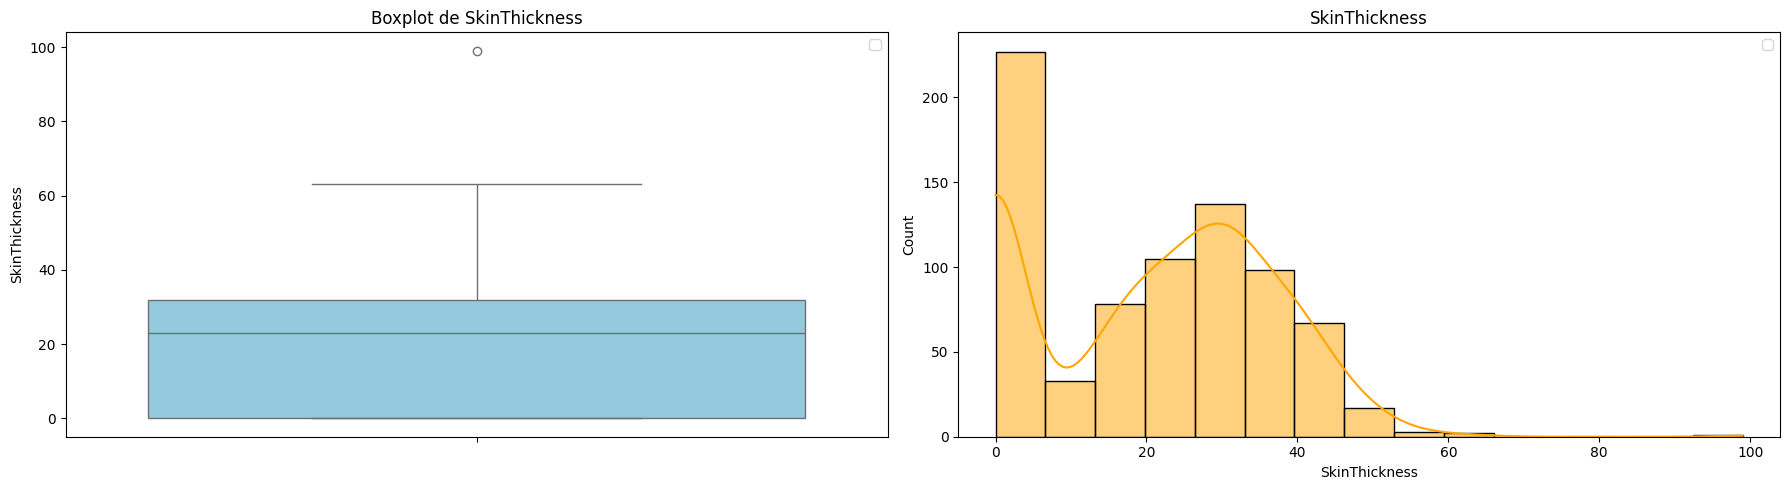

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


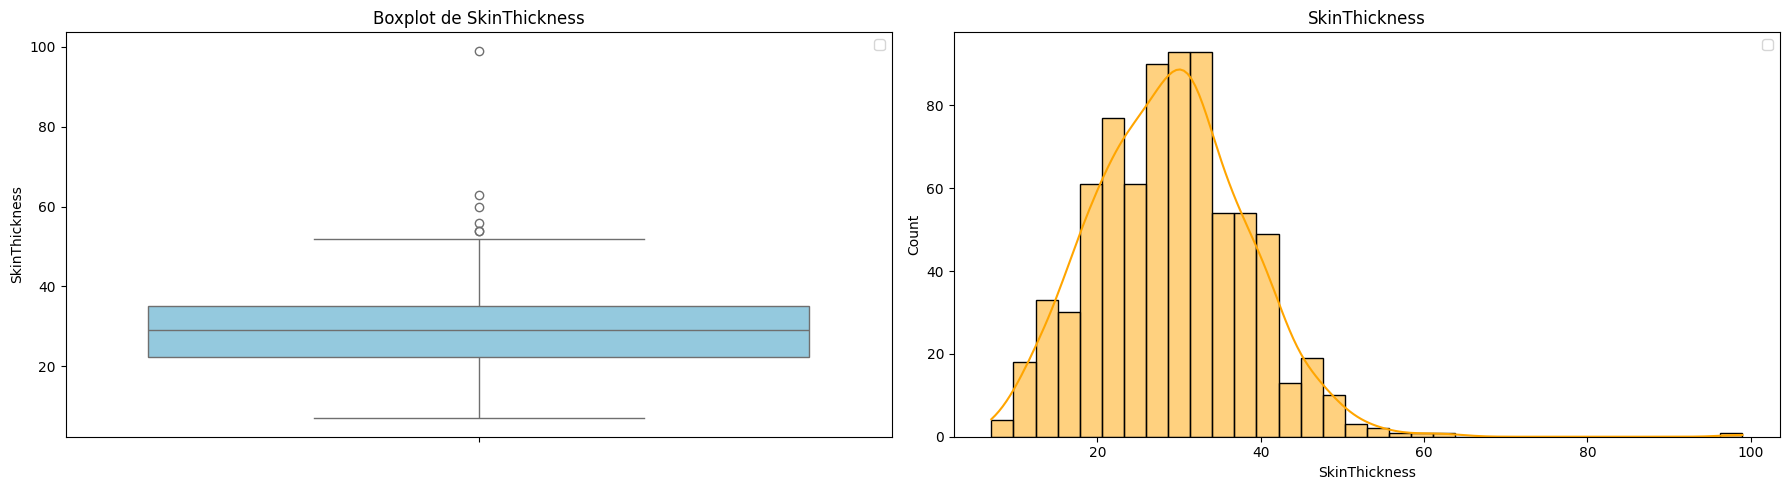

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


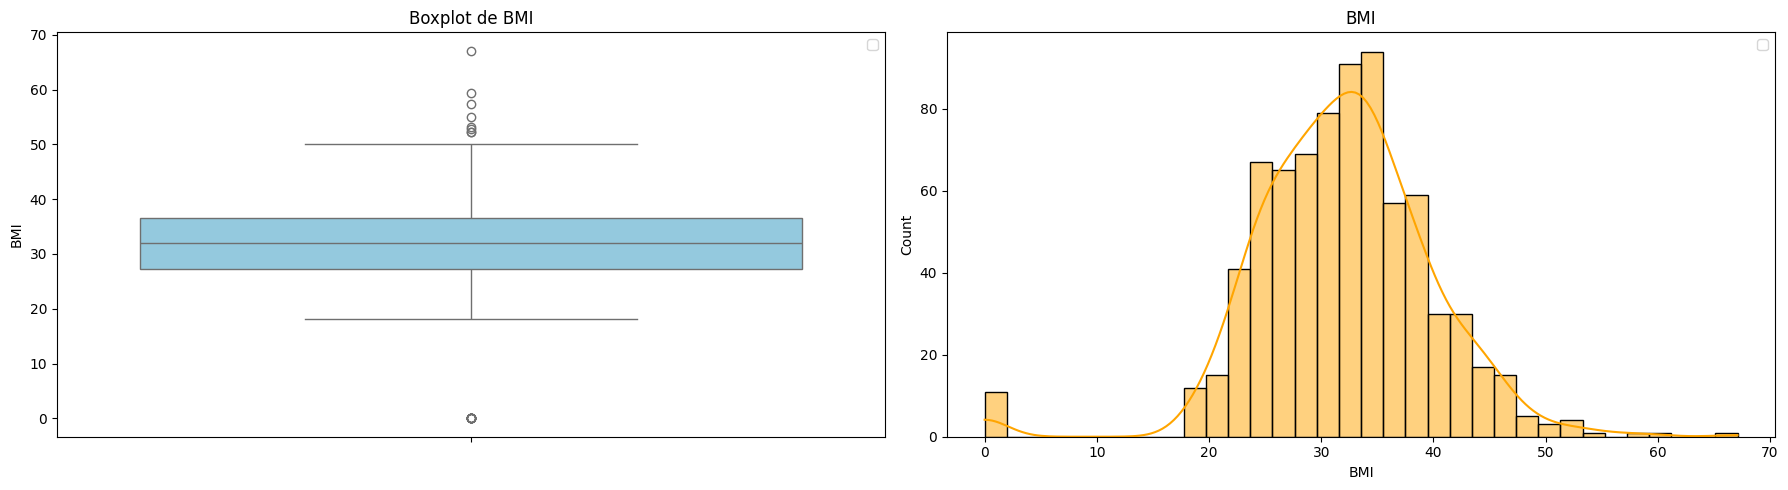

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


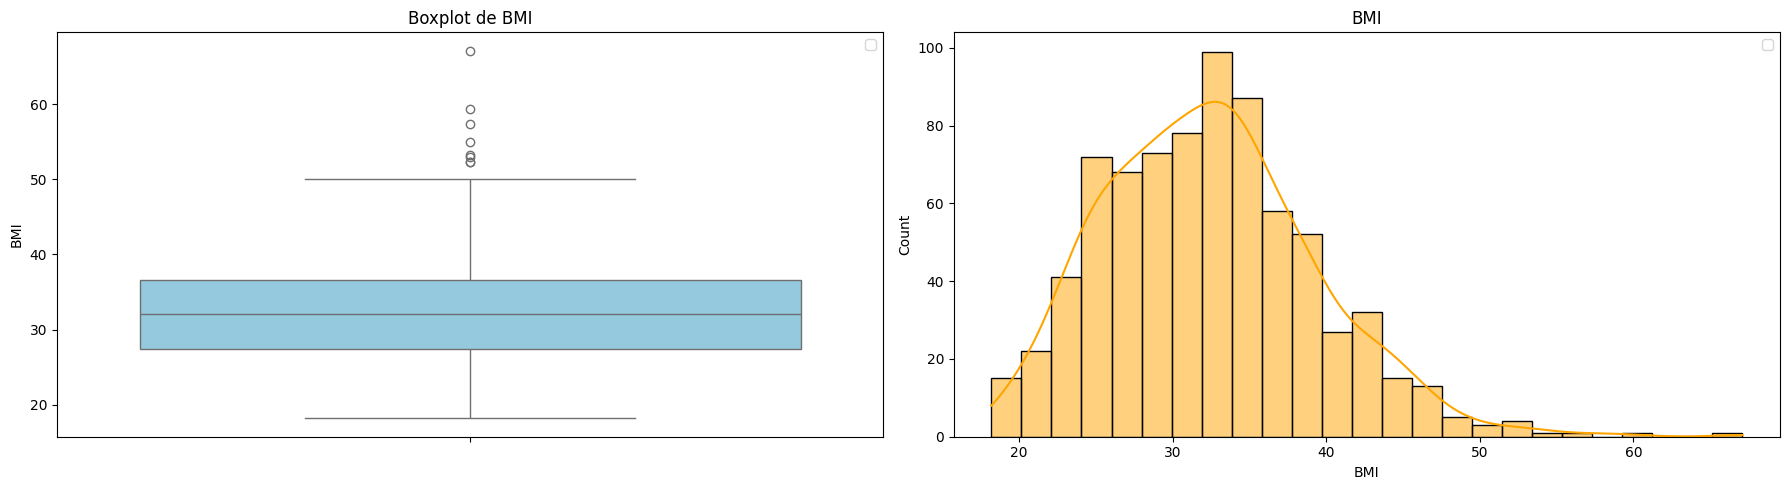

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


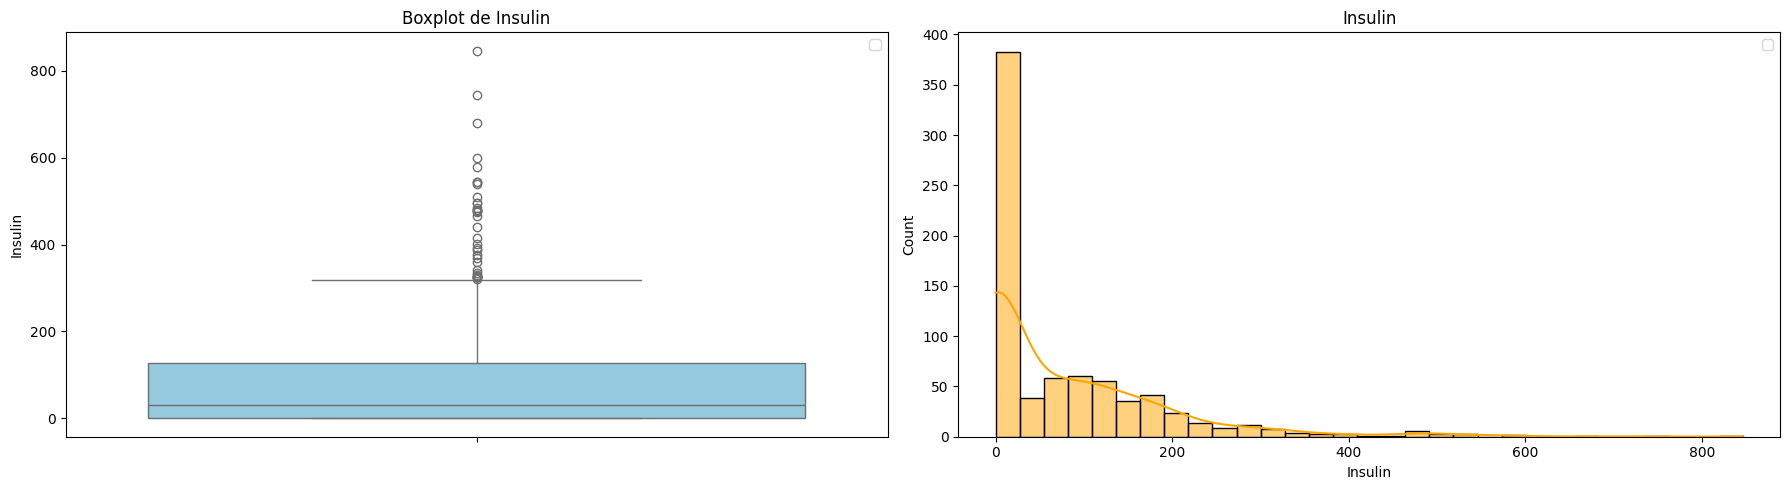

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


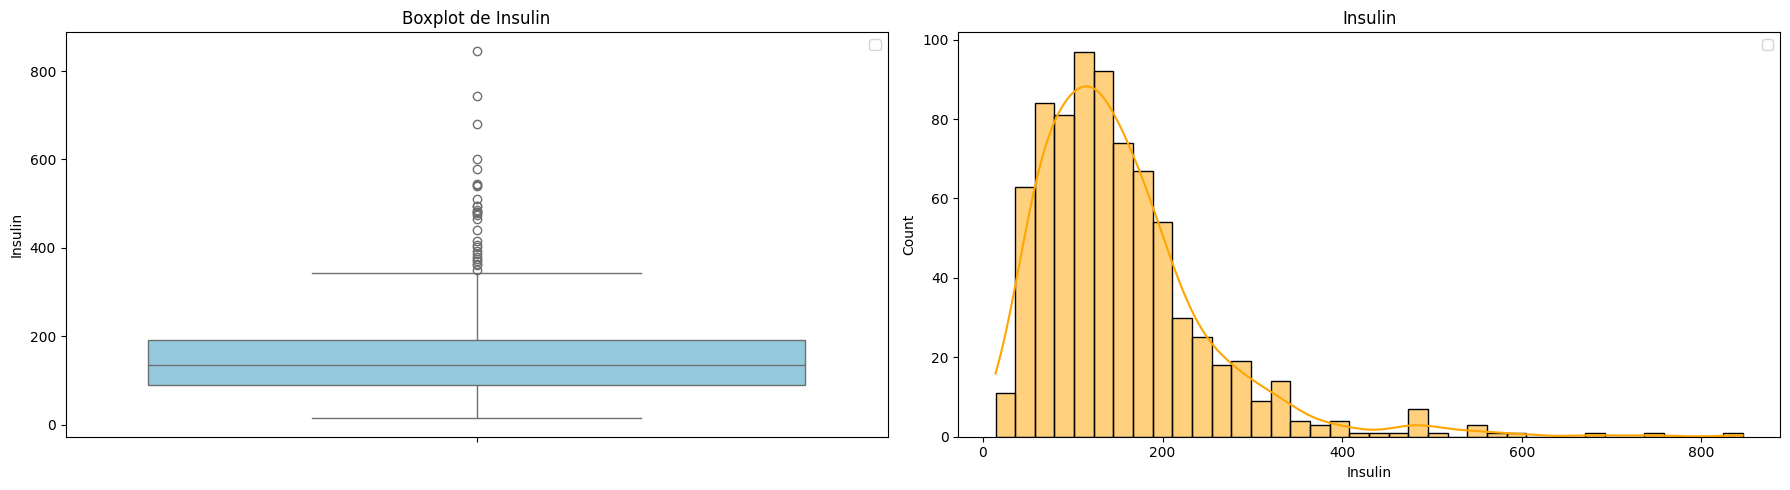

In [5]:
# Après l'application de knn sur les valeurs manquer
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin'] 
for col in columns:
    visualization(dataset, col)
    visualization(dataset_1, col)


*️⃣ Sans utiliser La standarisation Avant knn : 

In [6]:
print("******************** Avant : is null : ****************************** \n", dataset.isnull().sum())
dataset.describe()

******************** Avant : is null : ****************************** 
 Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,191.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,383.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,575.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [7]:
dataset_2 = knn_imputation_without_standarisation(dataset)

In [8]:
print("******************** Après : is null : ****************************** \n", dataset_2.isnull().sum())
dataset_2.describe()

******************** Après : is null : ****************************** 
 Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,121.612760,72.373698,29.203125,153.630990,32.426328,0.471876,33.240885
std,221.846794,3.369578,30.477714,12.193237,9.169946,99.129224,6.896203,0.331329,11.760232
min,0.000000,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,191.750000,1.000000,99.000000,64.000000,23.000000,90.000000,27.475000,0.243750,24.000000
50%,383.500000,3.000000,117.000000,72.000000,29.400000,130.000000,32.290000,0.372500,29.000000
75%,575.250000,6.000000,140.250000,80.000000,34.400000,190.000000,36.600000,0.626250,41.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### 2️⃣ Utiliser des techniques statistiques (ex. : boîte à moustaches, z-score, IQR) pour détecter les outliers.

IQR (Pregnancies): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  1.0
Q3 (75%) :  6.0
IQR :  5.0
Nombre des outliers détectés : 86
Pourcentage f'outliers: 12.61%
Limites: [-6.50, 8.50]]
La distribution des Pregnancies avec les bornes sup/inf :


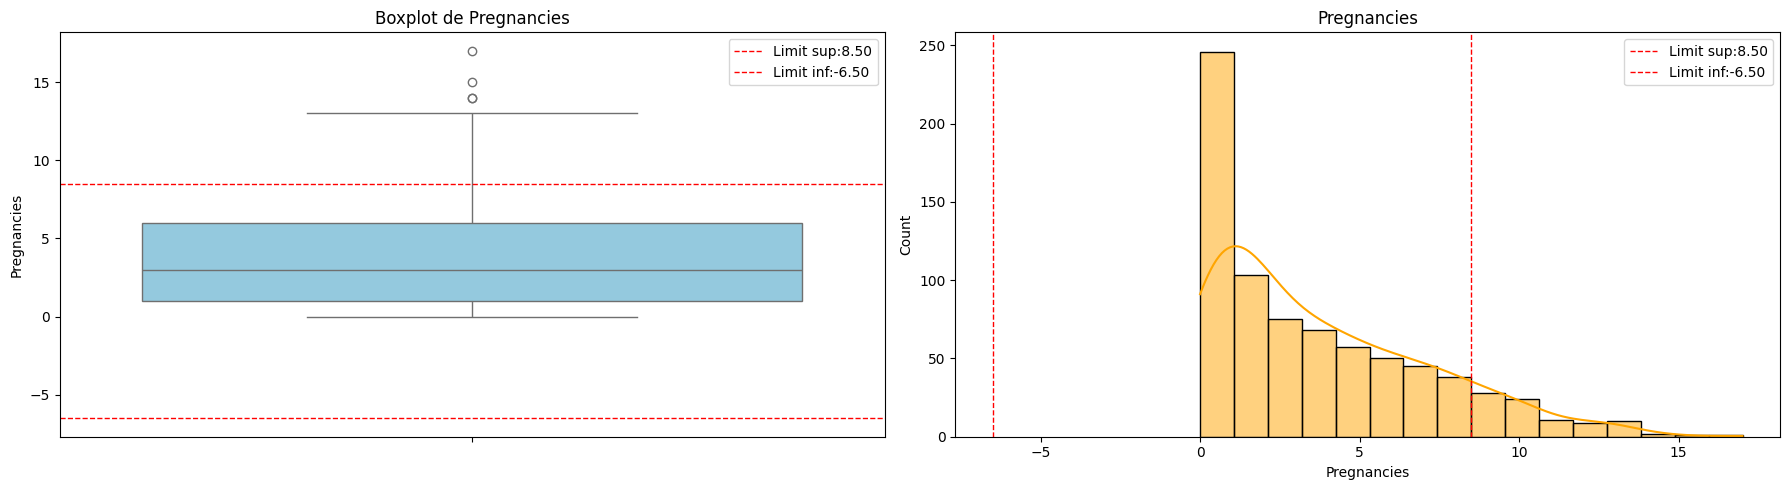

Z-SCORE (Pregnancies): *******************************************************************************************
Moyenne: 3.85
Ecart-type: 3.37
Seuil Z-SCORE: 3
Nombre des outliers détectés : 4
Pourcentage f'outliers: 0.52%
Limites: [-6.26, 13.95]
La distribution des Pregnancies avec les bornes sup/inf :


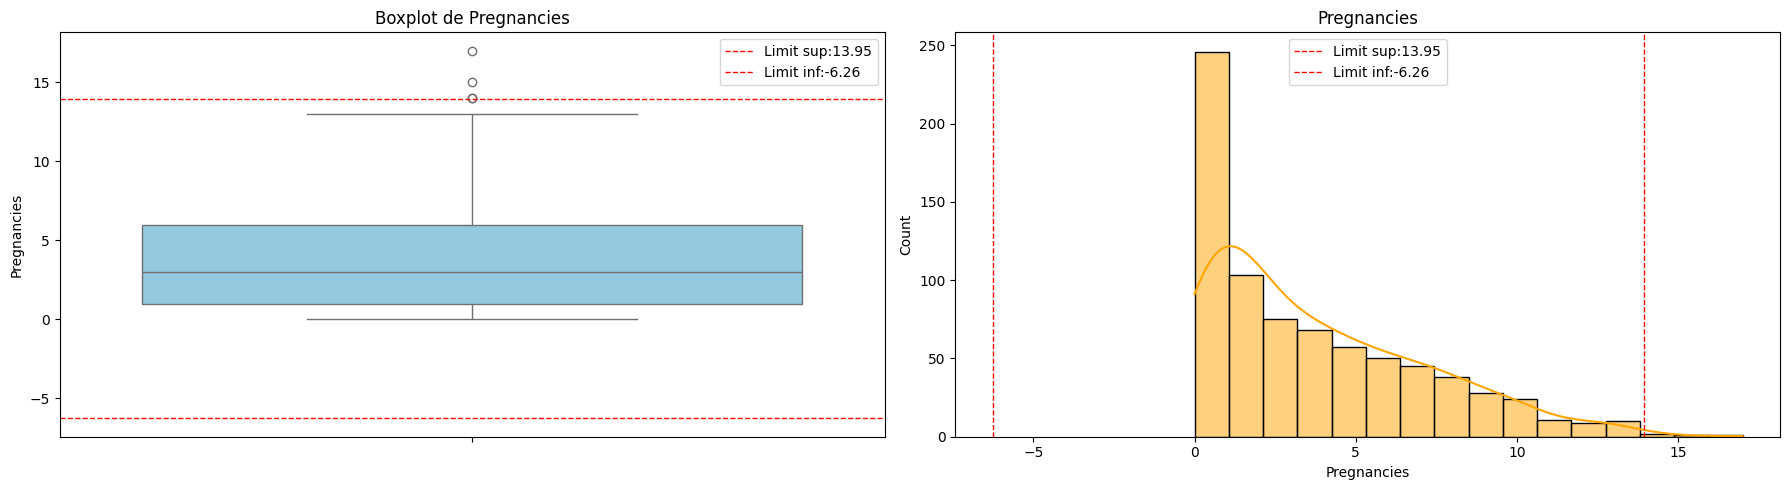

IQR (Glucose): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  99.0
Q3 (75%) :  140.25
IQR :  41.25
Nombre des outliers détectés : 101
Pourcentage f'outliers: 15.14%
Limites: [37.12, 160.88]]
La distribution des Glucose avec les bornes sup/inf :


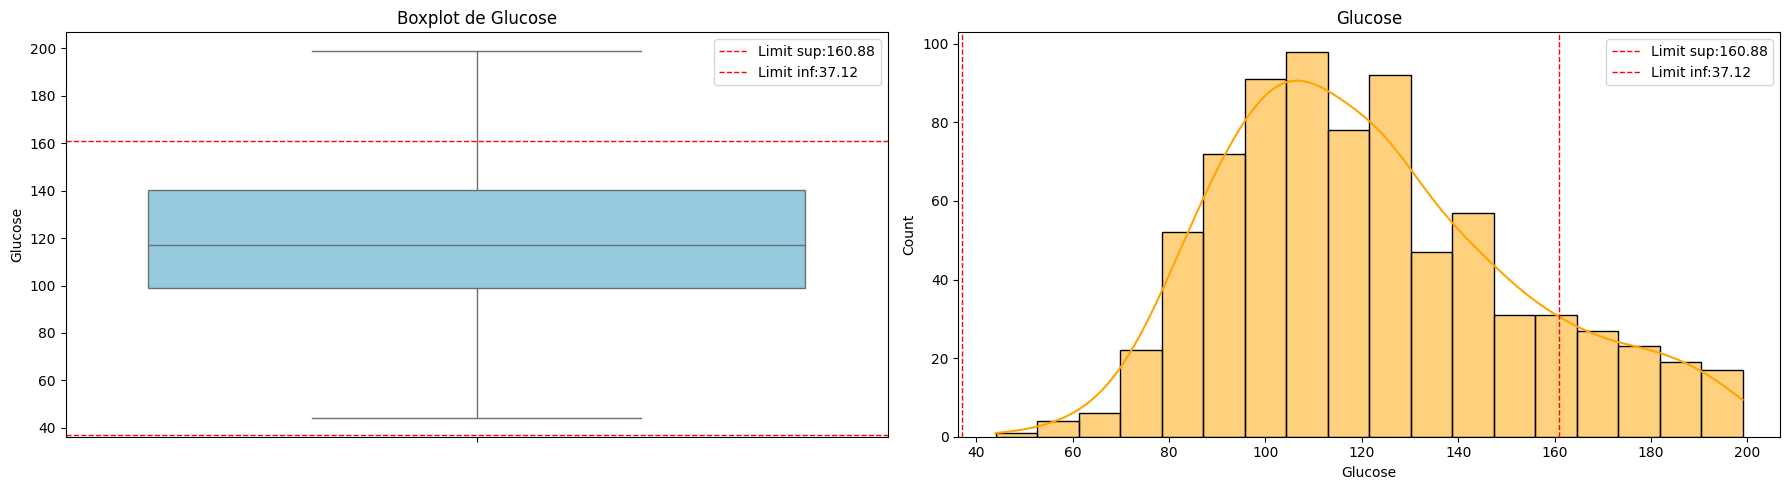

Z-SCORE (Glucose): *******************************************************************************************
Moyenne: 121.58
Ecart-type: 30.50
Seuil Z-SCORE: 3
Nombre des outliers détectés : 0
Pourcentage f'outliers: 0.00%
Limites: [30.09, 213.08]
La distribution des Glucose avec les bornes sup/inf :


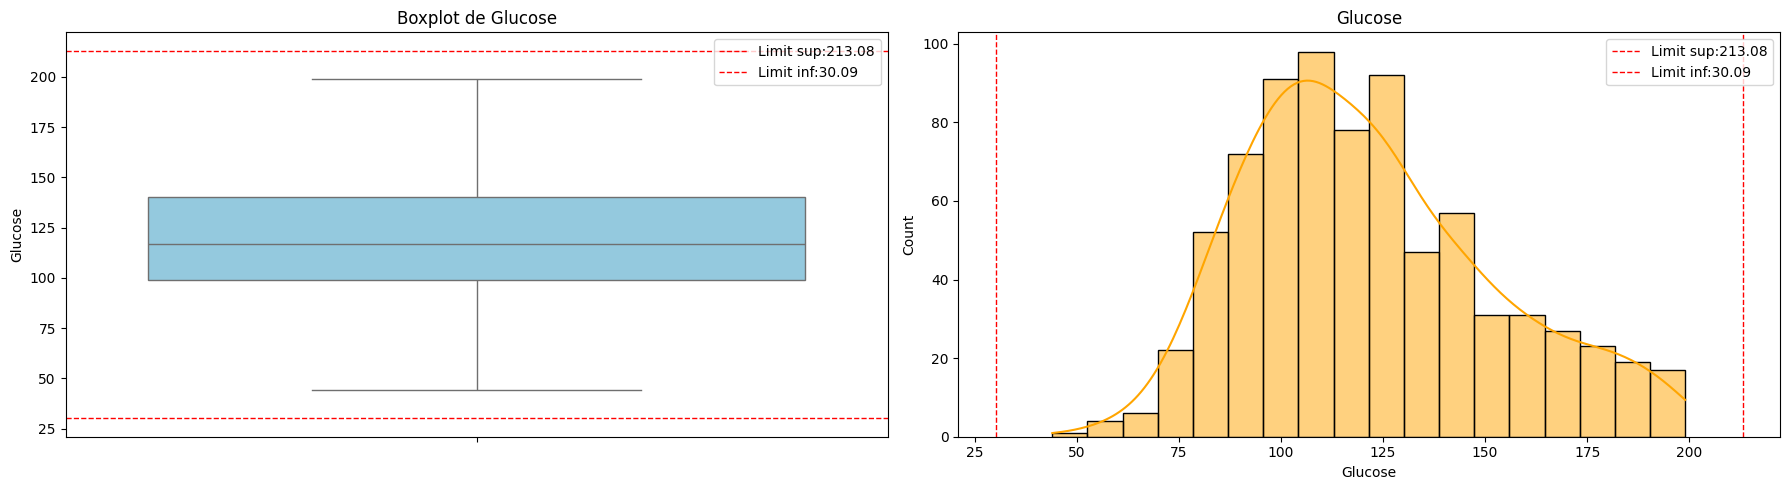

IQR (BloodPressure): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  64.0
Q3 (75%) :  80.0
IQR :  16.0
Nombre des outliers détectés : 64
Pourcentage f'outliers: 9.09%
Limites: [40.00, 88.00]]
La distribution des BloodPressure avec les bornes sup/inf :


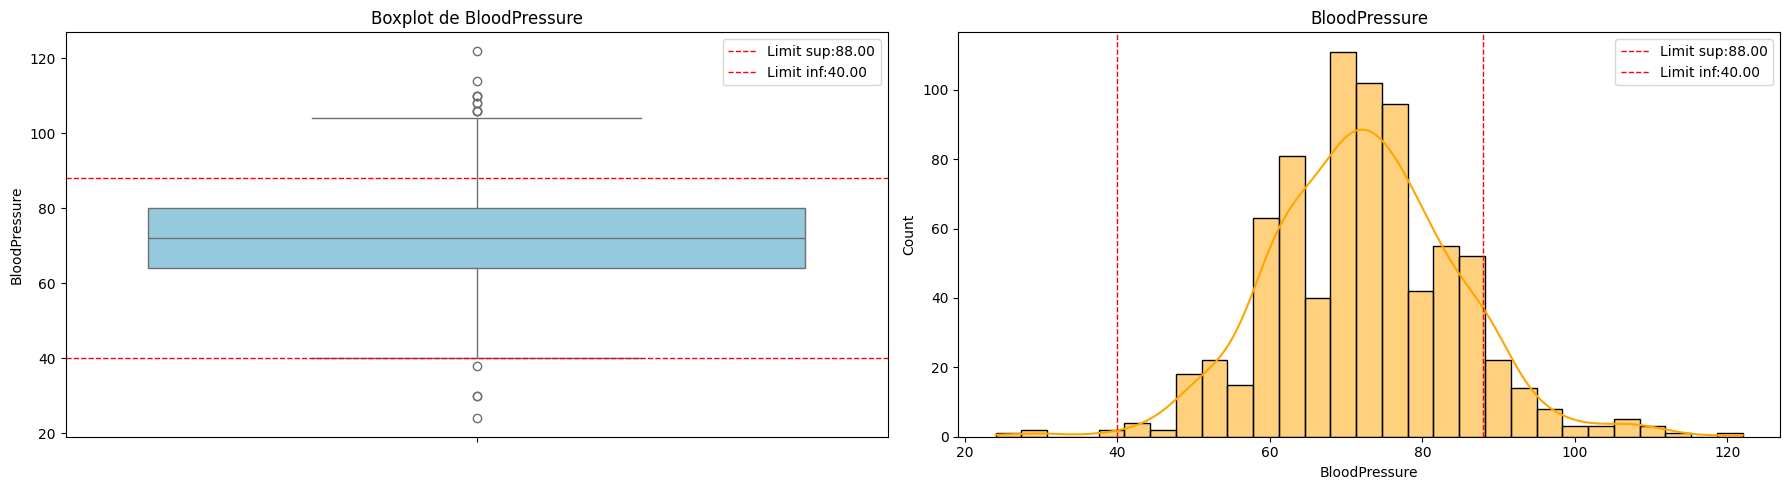

Z-SCORE (BloodPressure): *******************************************************************************************
Moyenne: 72.29
Ecart-type: 12.20
Seuil Z-SCORE: 3
Nombre des outliers détectés : 8
Pourcentage f'outliers: 1.05%
Limites: [35.70, 108.88]
La distribution des BloodPressure avec les bornes sup/inf :


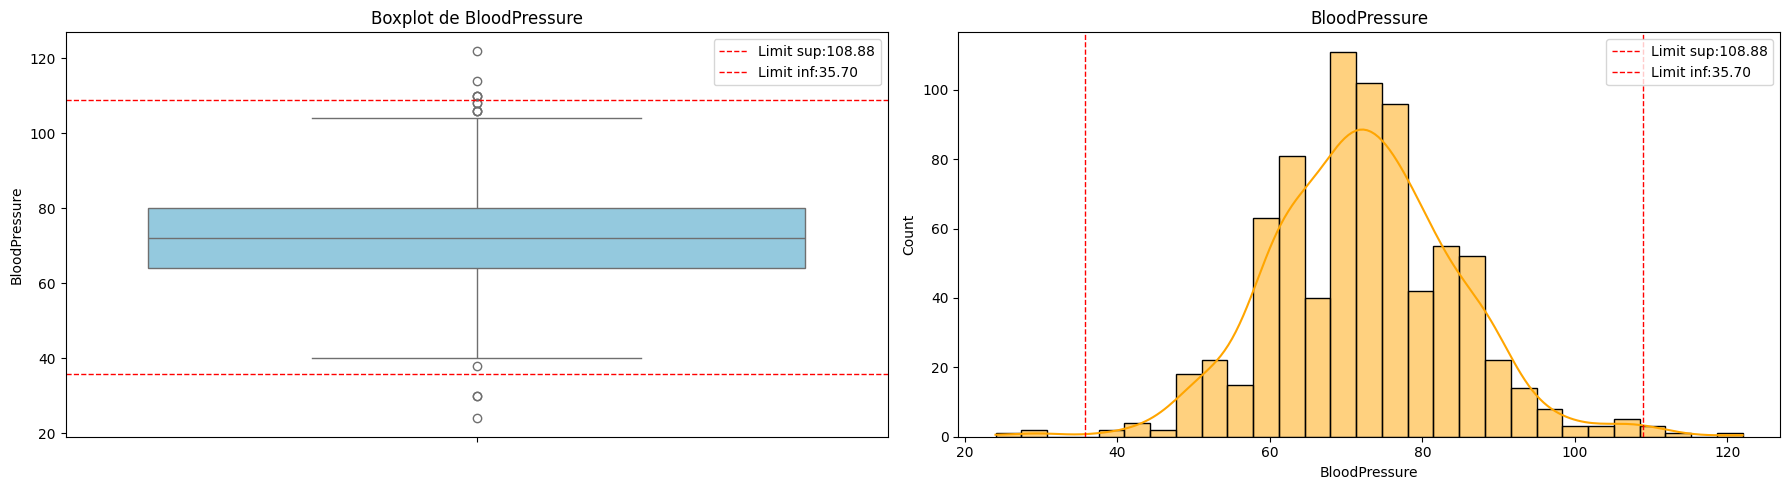

IQR (SkinThickness): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  22.400000000000002
Q3 (75%) :  35.0
IQR :  12.599999999999998
Nombre des outliers détectés : 66
Pourcentage f'outliers: 9.40%
Limites: [3.50, 41.30]]
La distribution des SkinThickness avec les bornes sup/inf :


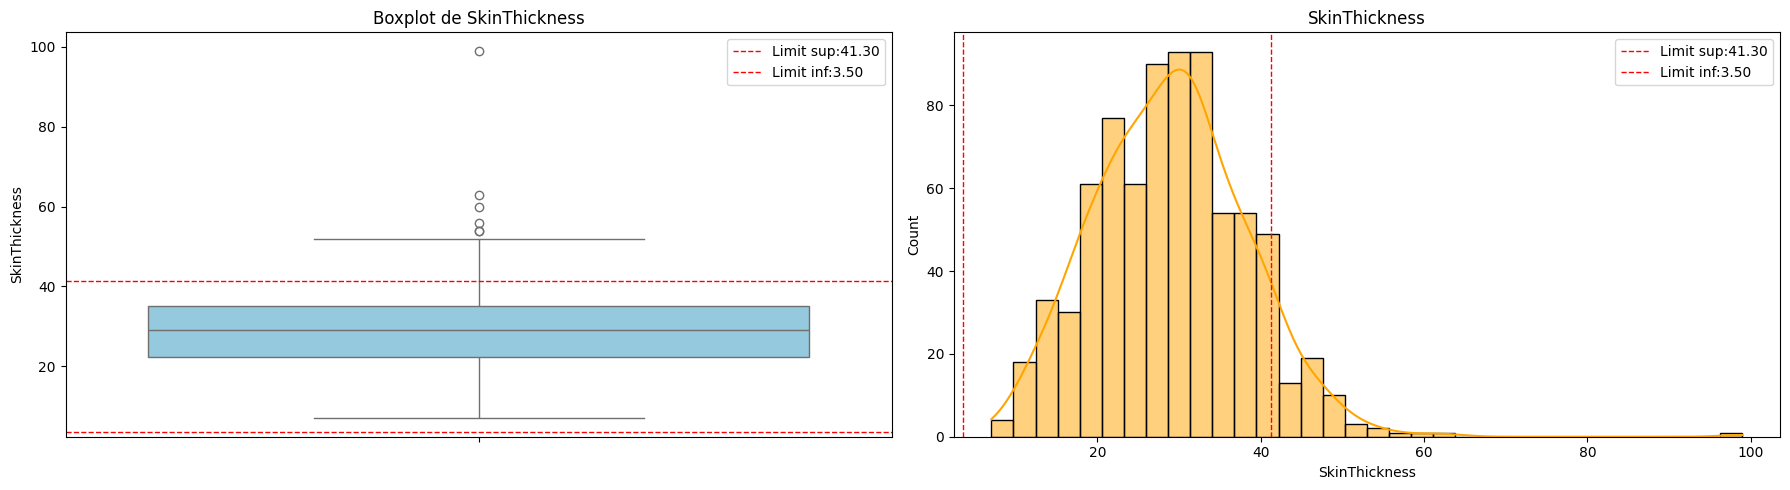

Z-SCORE (SkinThickness): *******************************************************************************************
Moyenne: 28.98
Ecart-type: 9.45
Seuil Z-SCORE: 3
Nombre des outliers détectés : 3
Pourcentage f'outliers: 0.39%
Limites: [0.64, 57.31]
La distribution des SkinThickness avec les bornes sup/inf :


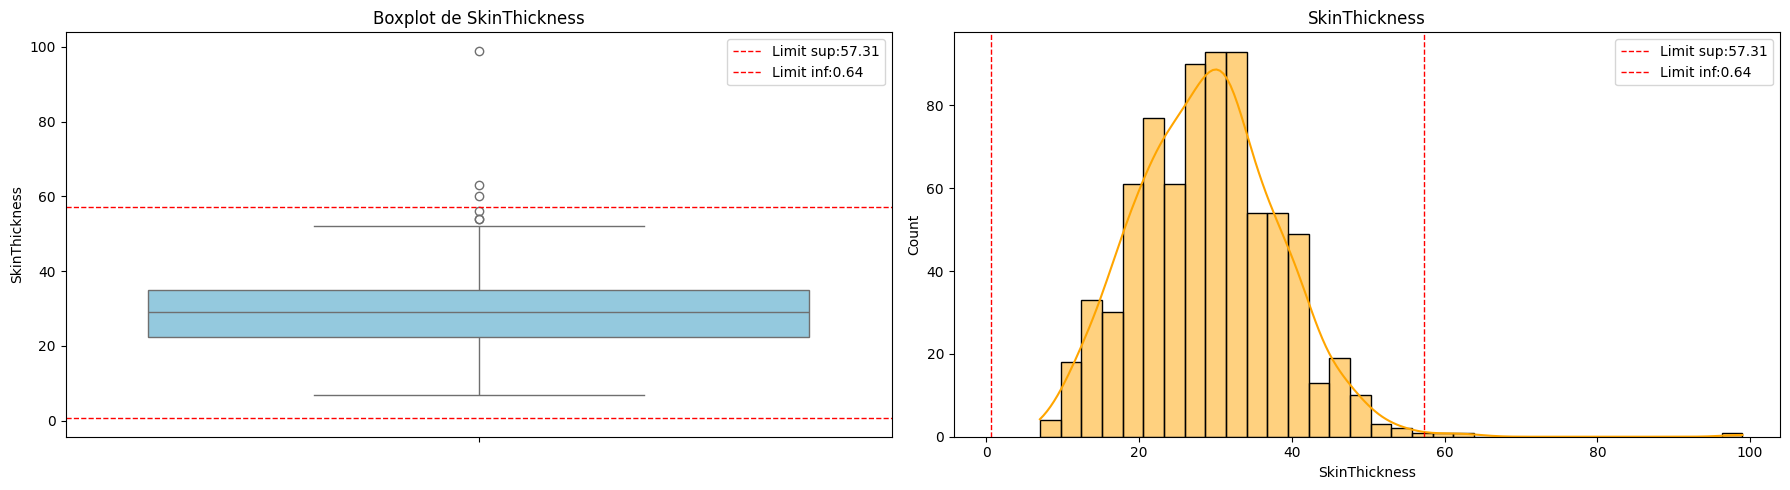

IQR (Insulin): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  88.95
Q3 (75%) :  191.05
IQR :  102.10000000000001
Nombre des outliers détectés : 103
Pourcentage f'outliers: 15.49%
Limites: [-64.20, 242.10]]
La distribution des Insulin avec les bornes sup/inf :


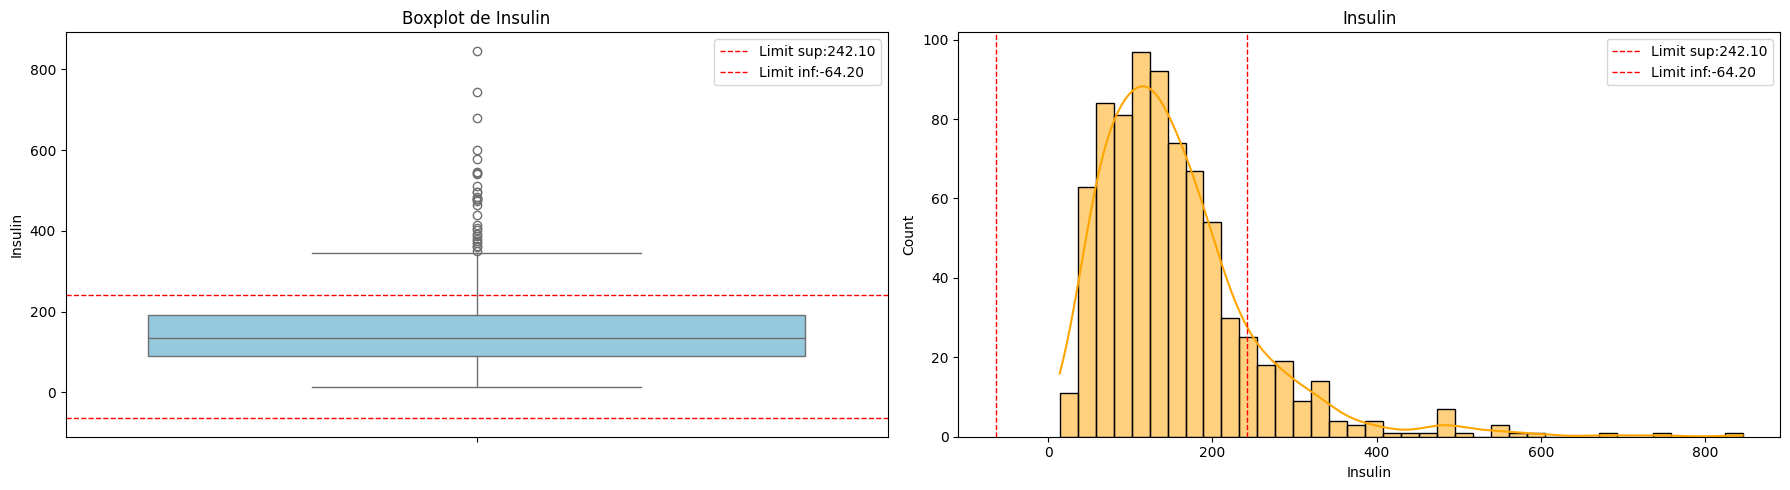

Z-SCORE (Insulin): *******************************************************************************************
Moyenne: 154.78
Ecart-type: 97.97
Seuil Z-SCORE: 3
Nombre des outliers détectés : 17
Pourcentage f'outliers: 2.26%
Limites: [-139.13, 448.69]
La distribution des Insulin avec les bornes sup/inf :


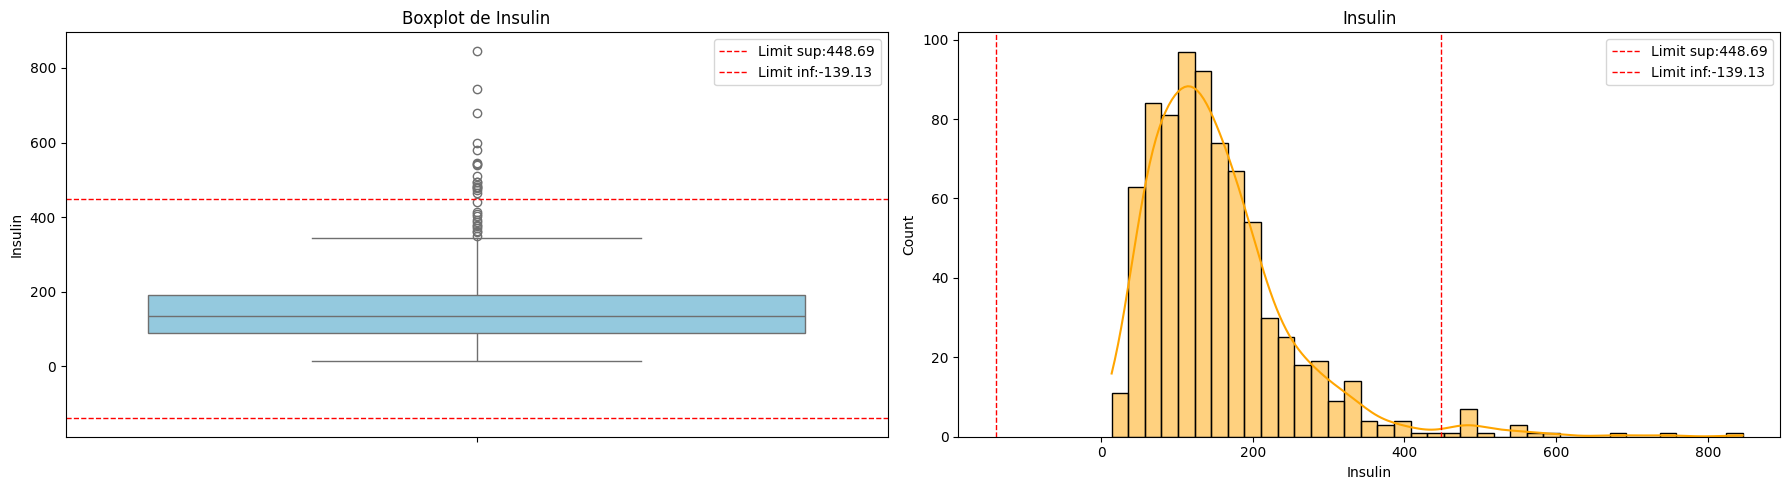

IQR (BMI): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  27.4
Q3 (75%) :  36.6
IQR :  9.200000000000003
Nombre des outliers détectés : 81
Pourcentage f'outliers: 11.79%
Limites: [13.60, 41.20]]
La distribution des BMI avec les bornes sup/inf :


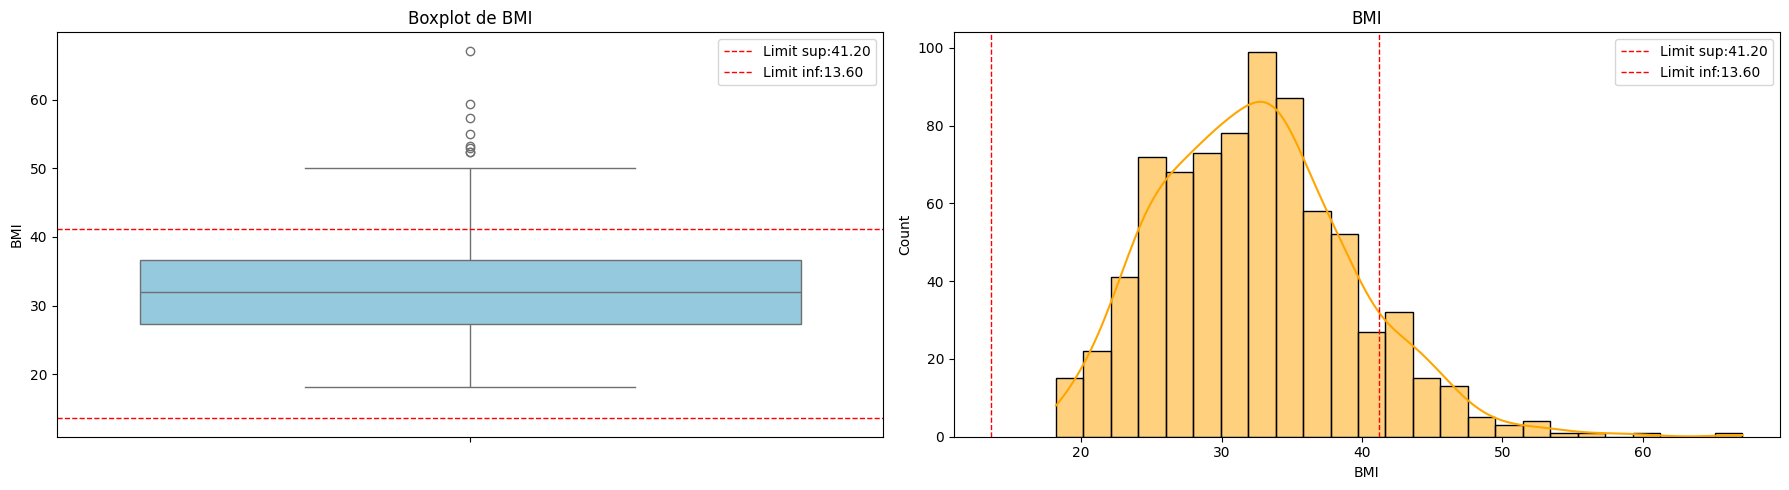

Z-SCORE (BMI): *******************************************************************************************
Moyenne: 32.40
Ecart-type: 6.90
Seuil Z-SCORE: 3
Nombre des outliers détectés : 5
Pourcentage f'outliers: 0.66%
Limites: [11.71, 53.10]
La distribution des BMI avec les bornes sup/inf :


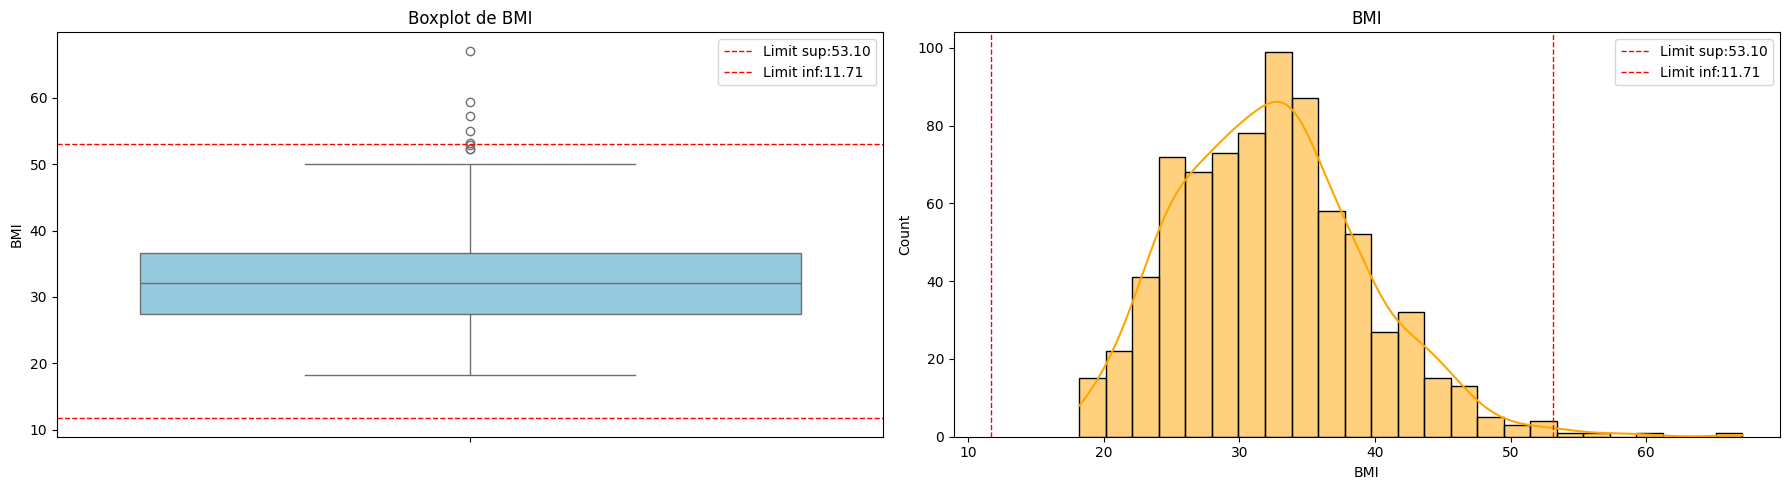

IQR (DiabetesPedigreeFunction): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  0.24375
Q3 (75%) :  0.62625
IQR :  0.38249999999999995
Nombre des outliers détectés : 97
Pourcentage f'outliers: 14.46%
Limites: [-0.33, 0.82]]
La distribution des DiabetesPedigreeFunction avec les bornes sup/inf :


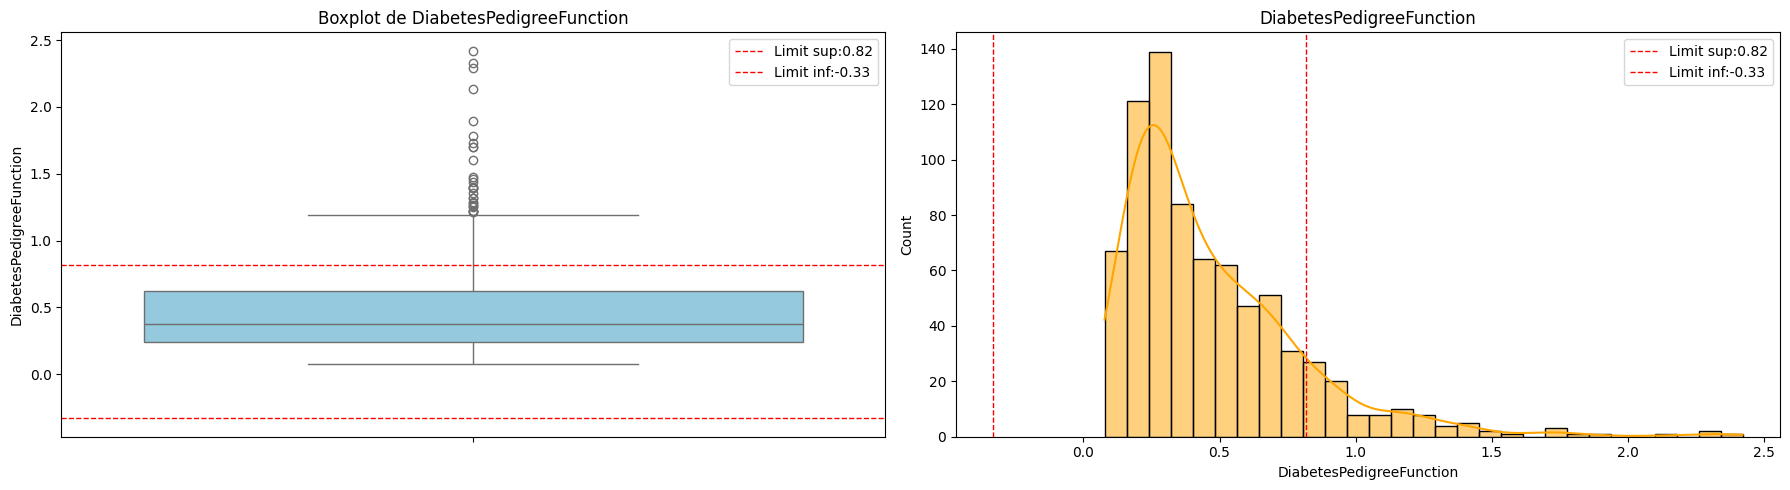

Z-SCORE (DiabetesPedigreeFunction): *******************************************************************************************
Moyenne: 0.47
Ecart-type: 0.33
Seuil Z-SCORE: 3
Nombre des outliers détectés : 11
Pourcentage f'outliers: 1.45%
Limites: [-0.52, 1.47]
La distribution des DiabetesPedigreeFunction avec les bornes sup/inf :


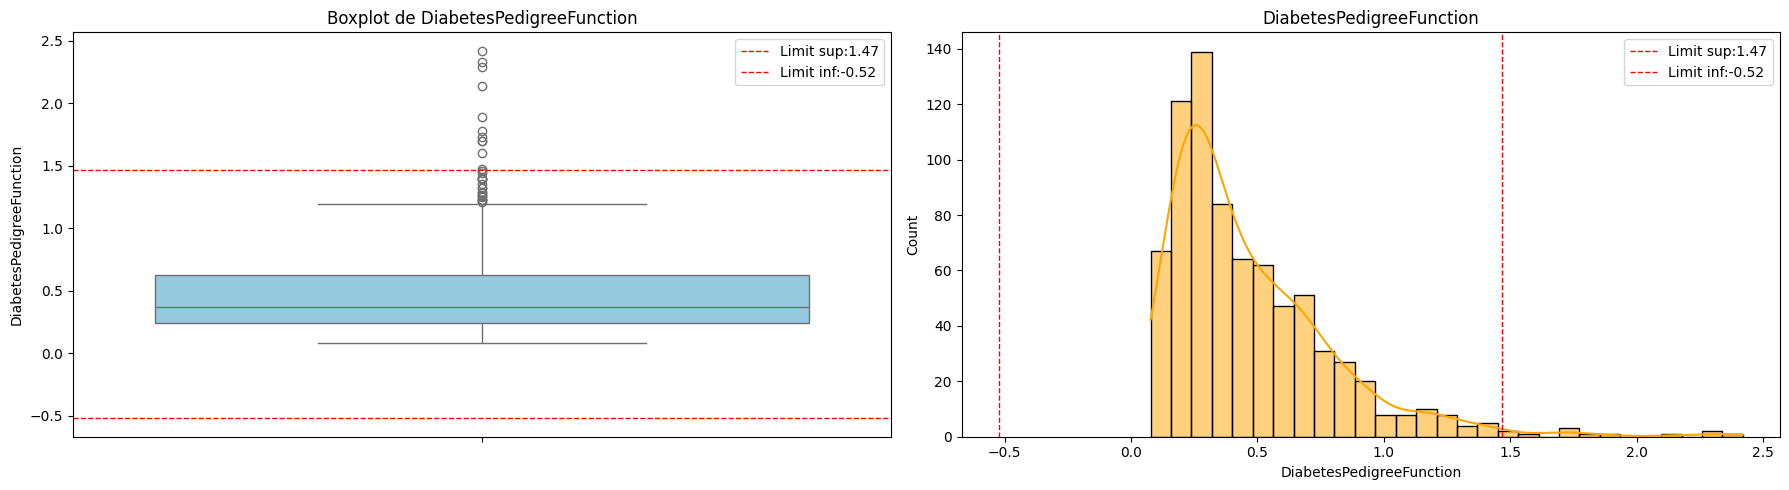

IQR (Age): *******************************************************************************************
Shape :  (768, 9)
Q1 (25%) :  24.0
Q3 (75%) :  41.0
IQR :  17.0
Nombre des outliers détectés : 89
Pourcentage f'outliers: 13.11%
Limites: [-1.50, 49.50]]
La distribution des Age avec les bornes sup/inf :


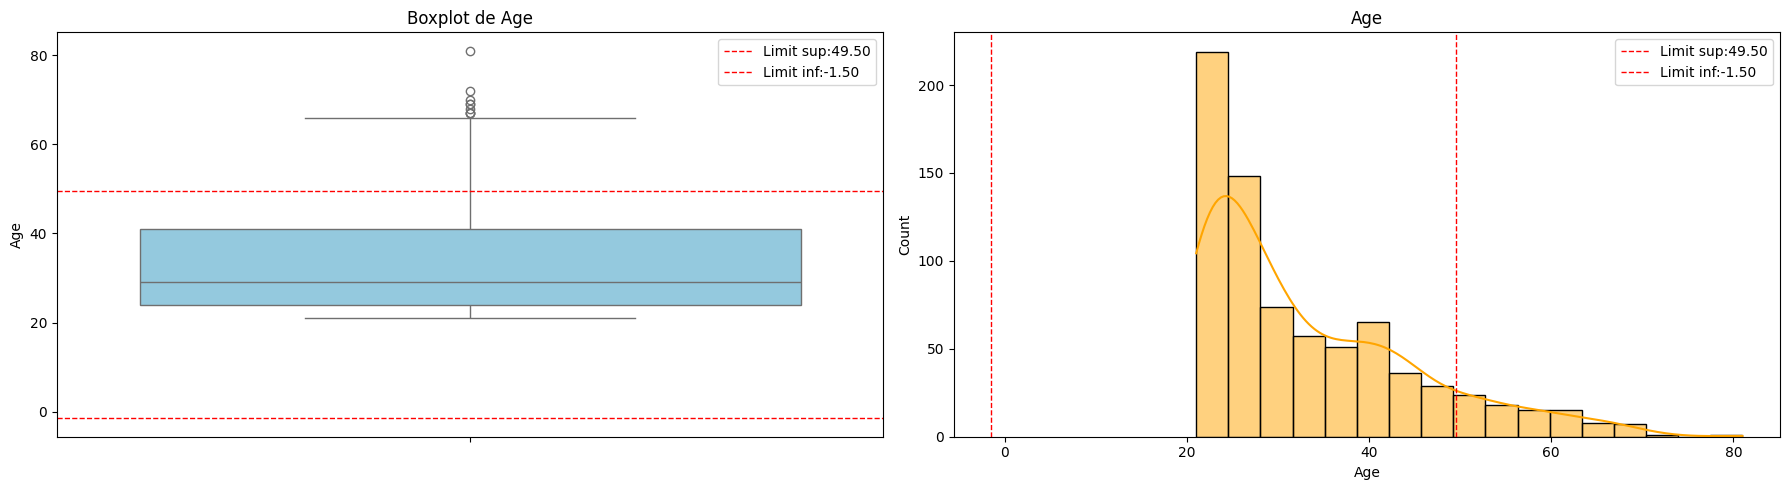

Z-SCORE (Age): *******************************************************************************************
Moyenne: 33.24
Ecart-type: 11.76
Seuil Z-SCORE: 3
Nombre des outliers détectés : 5
Pourcentage f'outliers: 0.66%
Limites: [-2.04, 68.52]
La distribution des Age avec les bornes sup/inf :


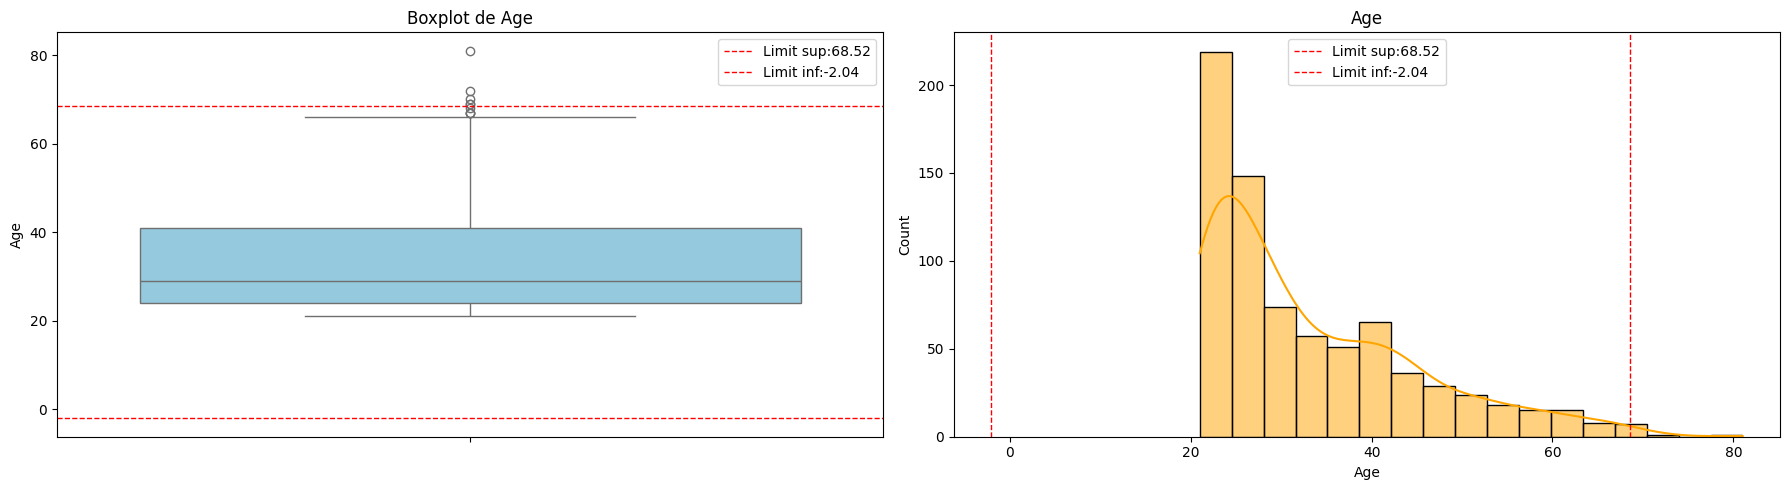

In [9]:
columns_iqr = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
columns_zscore = []
for col in columns_iqr:
    print(f"IQR ({col}): *******************************************************************************************")
    detecte_outliers_with_iqr(dataset_1, col )
    print(f"Z-SCORE ({col}): *******************************************************************************************")
    detect_outliers_z_score(dataset_1, col)

Tableau des résultats : 

<table border="1" style="border-collapse: collapse; width: 100%; font-family: Arial, sans-serif;">
    <thead>
        <tr style="background-color: #4CAF50; color: white;">
            <th>Variable</th>
            <th>N Outliers Z-Score</th>
            <th>% Outliers Z-Score</th>
            <th>N Outliers IQR</th>
            <th>% Outliers IQR</th>
            <th>Méthode Choisie</th>
            <th>Justification</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><strong>Pregnancies</strong></td>
            <td>4</td>
            <td>0.52%</td>
            <td>86</td>
            <td>12.61%</td>
            <td><strong>Transformation + Z-Score</strong></td>
            <td>Distribution raisonnable, Z-score conserve + de données</td>
        </tr>
        <tr>
            <td><strong>Glucose</strong></td>
            <td>0</td>
            <td>0.00%</td>
            <td>101</td>
            <td>15.14%</td>
            <td><strong>Z-Score</strong></td>
            <td>Aucun outlier avec Z-score, distribution normale</td>
        </tr>
        <tr>
            <td><strong>BloodPressure</strong></td>
            <td>8</td>
            <td>1.05%</td>
            <td>64</td>
            <td>9.09%</td>
            <td><strong>Z-Score</strong></td>
            <td>Z-score moins restrictif, préserve l'information médicale</td>
        </tr>
        <tr>
            <td><strong>SkinThickness</strong></td>
            <td>3</td>
            <td>0.39%</td>
            <td>66</td>
            <td>9.40%</td>
            <td><strong>Z-Score</strong></td>
            <td>Faible % d'outliers avec Z-score, méthode conservative</td>
        </tr>
        <tr style="background-color: #443f2eff;">
            <td><strong>Insulin</strong></td>
            <td>17</td>
            <td>2.26%</td>
            <td>103</td>
            <td>15.49%</td>
            <td><strong>Transformation + Z-Score</strong></td>
            <td>Distribution très asymétrique → log1p puis Z-score</td>
        </tr>
        <tr>
            <td><strong>BMI</strong></td>
            <td>5</td>
            <td>0.66%</td>
            <td>81</td>
            <td>11.79%</td>
            <td><strong>Z-Score</strong></td>
            <td>Distribution acceptable, Z-score préserve les données</td>
        </tr>
        <tr style="background-color: #443f2eff;">
            <td><strong>DiabetesPedigreeFunction</strong></td>
            <td>11</td>
            <td>1.45%</td>
            <td>97</td>
            <td>14.46%</td>
            <td><strong>Transformation + Z-Score</strong></td>
            <td>Asymétrie importante → log1p puis Z-score</td>
        </tr>
        <tr>
            <td><strong>Age</strong></td>
            <td>5</td>
            <td>0.66%</td>
            <td>89</td>
            <td>13.11%</td>
            <td><strong>Z-Score</strong></td>
            <td>Distribution normale, Z-score adapté</td>
        </tr>
    </tbody>
</table>

### 3️⃣ Gérer les lignes contenant des valeurs aberrantes dans les colonnes pertinentes.

#### *️⃣ Appliquer log1p sur les colonnes des distributions asymétriques: 

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


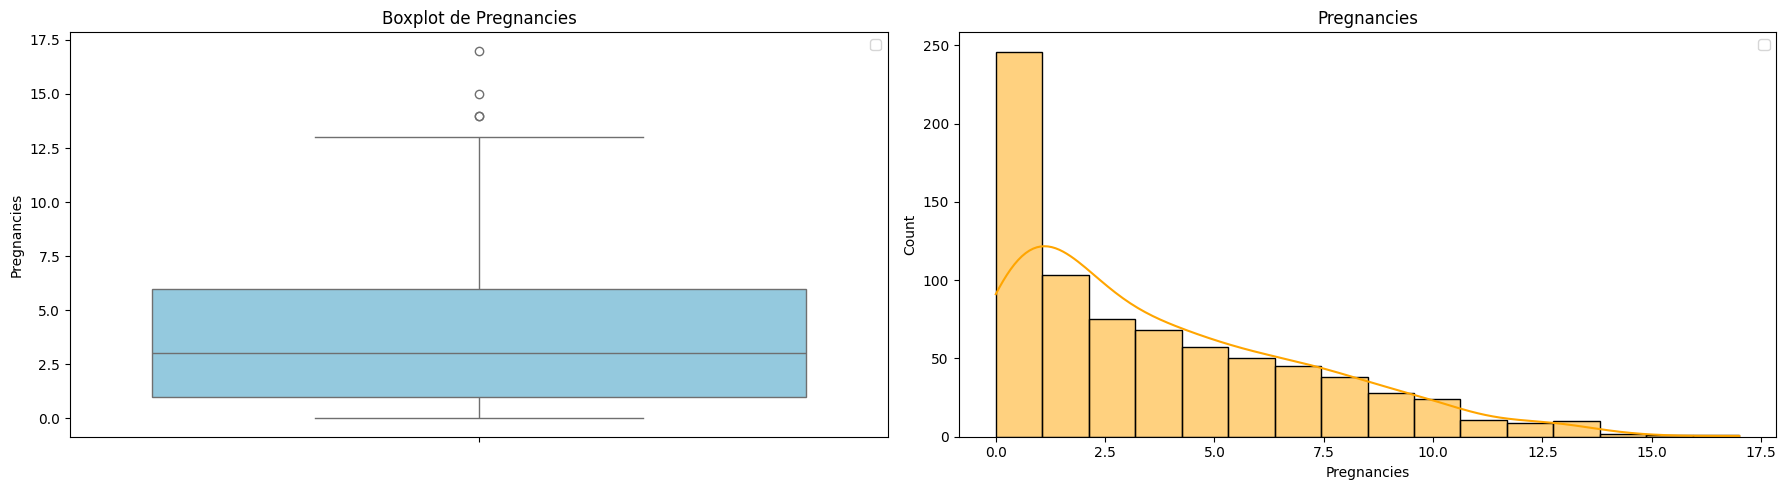

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


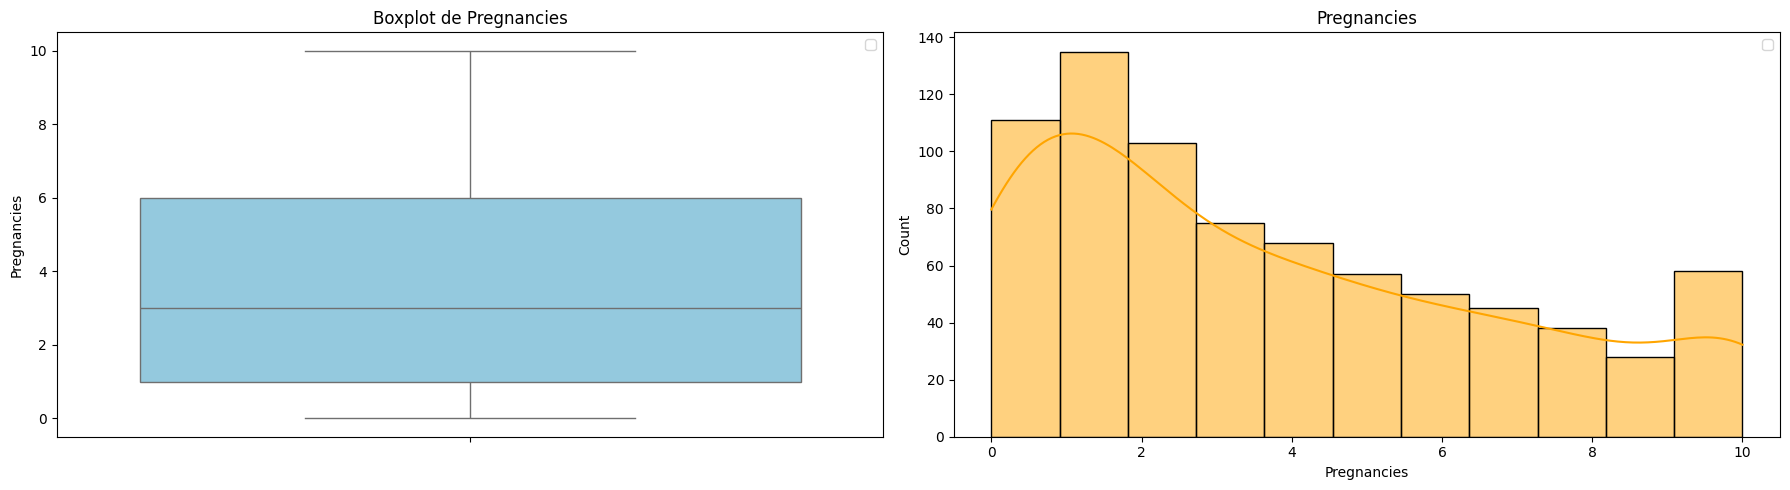

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


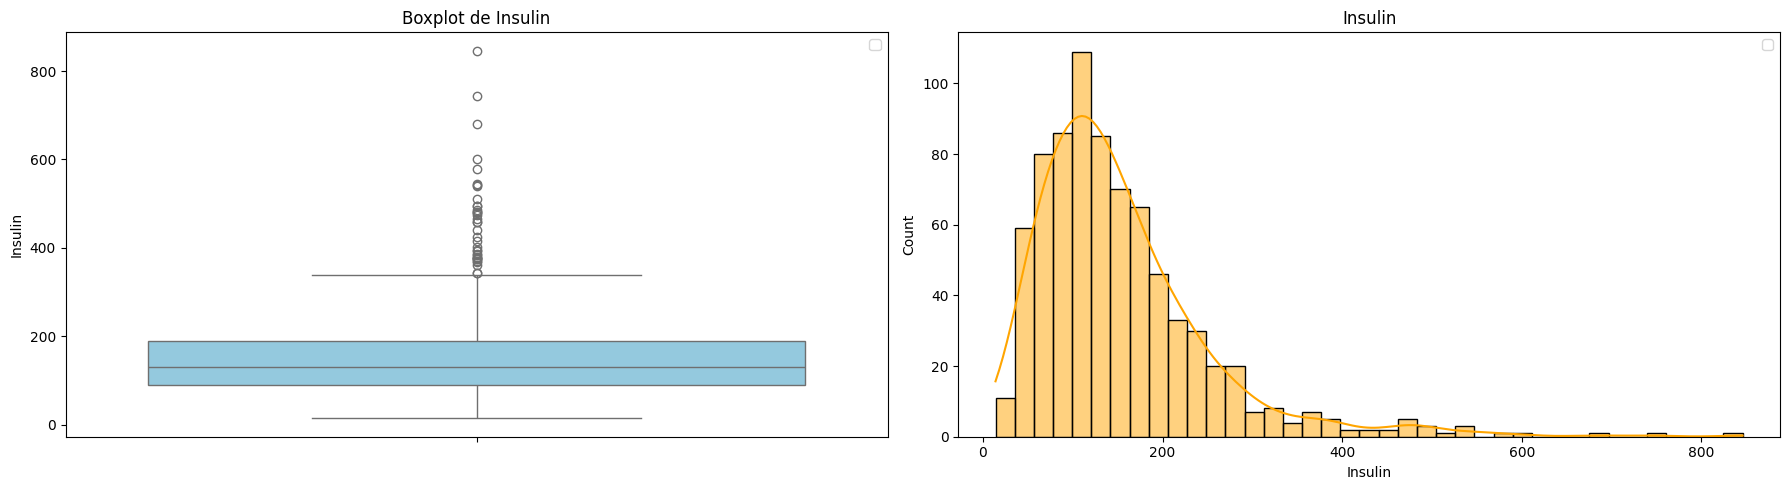

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


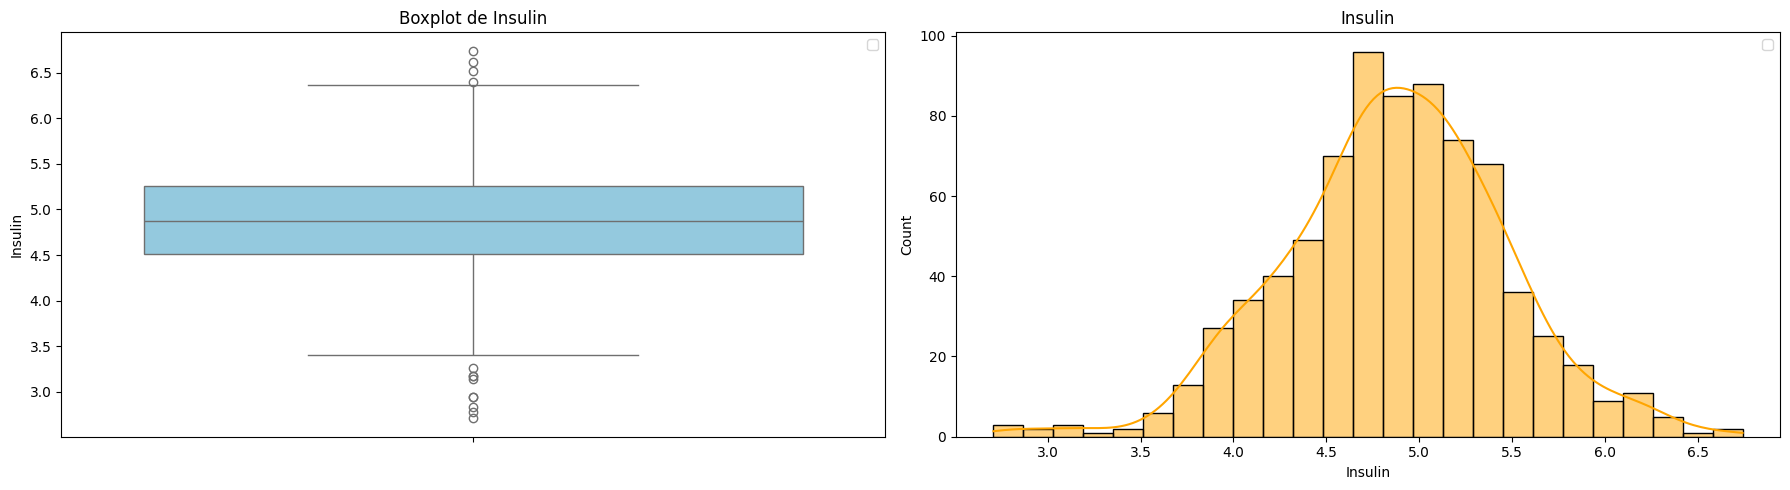

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


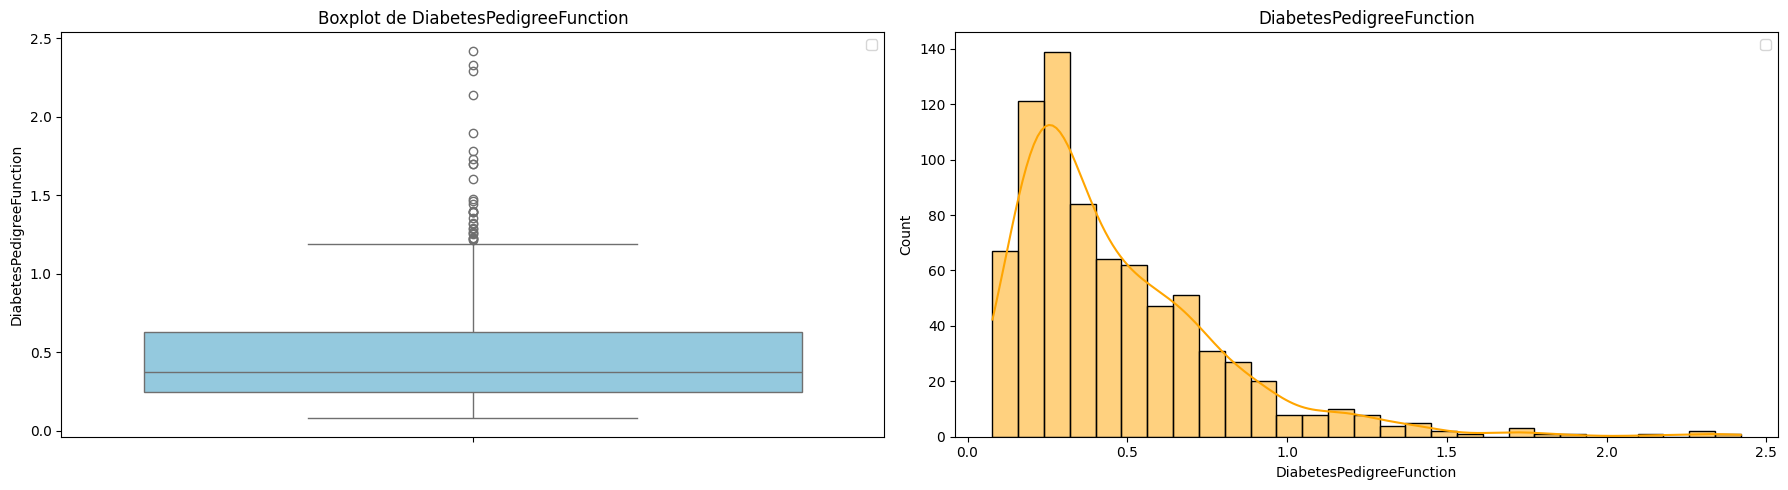

c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
c:\Users\ramas\OneDrive\Desktop\Analysis_and_Prediction_of_the_Risk_of_Diabetes\viz.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


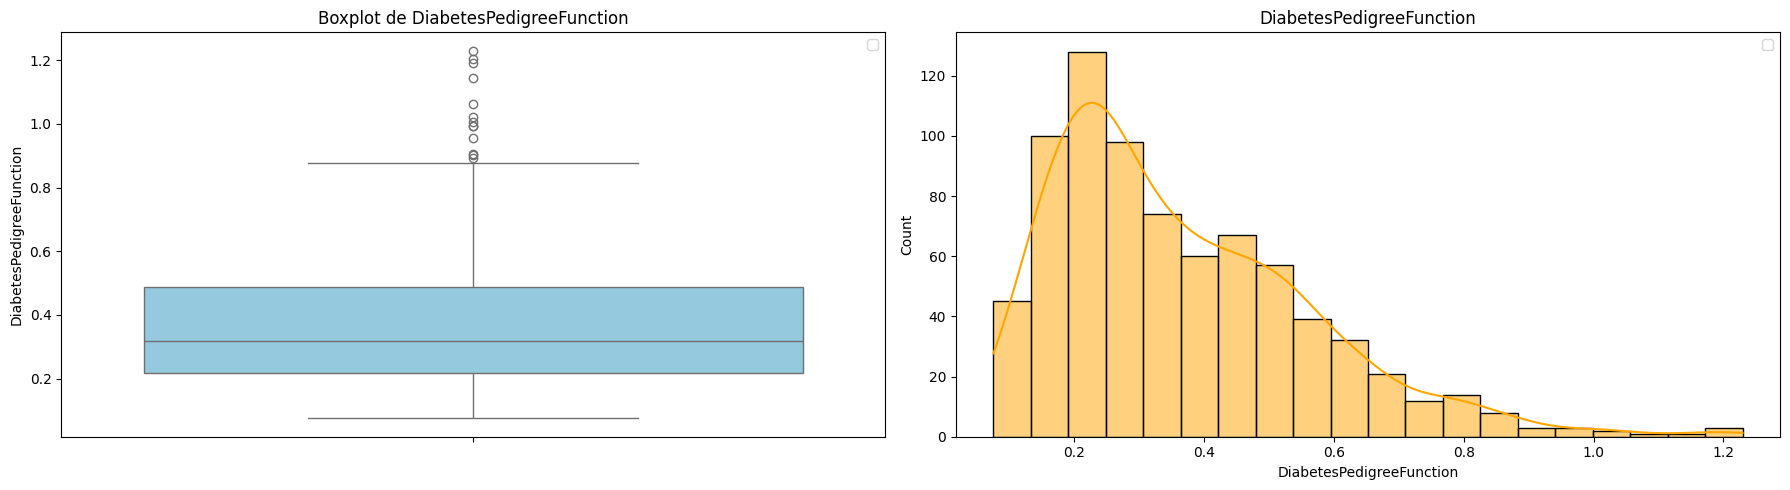

In [10]:

def preparation_finale_model(df):
    df_prepare = df.copy()
    
    # Transformations
    df_prepare['Insulin'] = np.log1p(df['Insulin'])
    df_prepare['DiabetesPedigreeFunction'] = np.log1p(df['DiabetesPedigreeFunction'])
    df_prepare['Pregnancies'] = winsorize(df['Pregnancies'], limits=[0.05, 0.05])
    
    return df_prepare

df_prepare = preparation_finale_model(dataset_2)

columns_problems = ['Pregnancies', 'Insulin', 'DiabetesPedigreeFunction']

for col in columns_problems:
    visualization(dataset_2, col)
    visualization(df_prepare, col)

#### *️⃣ Appliquer le z-score sur toutes les colonnes : 

Moyenne: 3.74
Ecart-type: 3.12
Seuil Z-SCORE: 3
Nombre des outliers détectés : 0
Pourcentage f'outliers: 0.00%
Limites: [-5.63, 13.11]
La distribution des Pregnancies avec les bornes sup/inf :


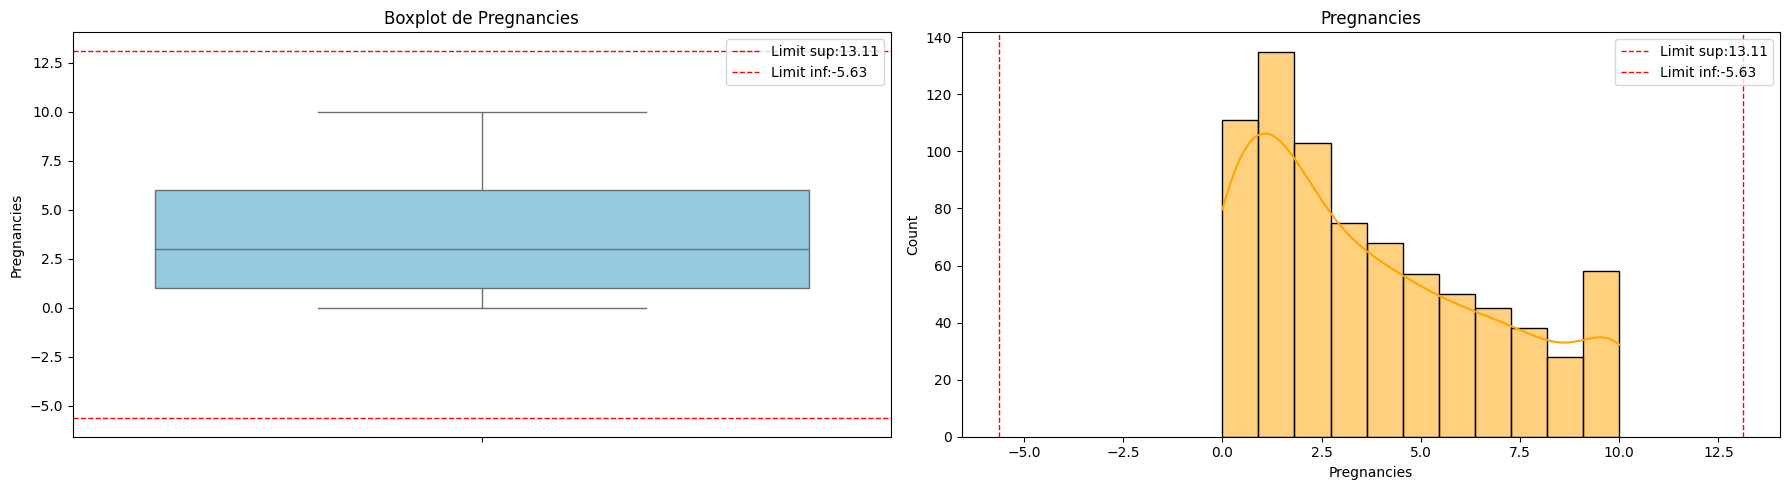

Moyenne: 121.61
Ecart-type: 30.48
Seuil Z-SCORE: 3
Nombre des outliers détectés : 0
Pourcentage f'outliers: 0.00%
Limites: [30.18, 213.05]
La distribution des Glucose avec les bornes sup/inf :


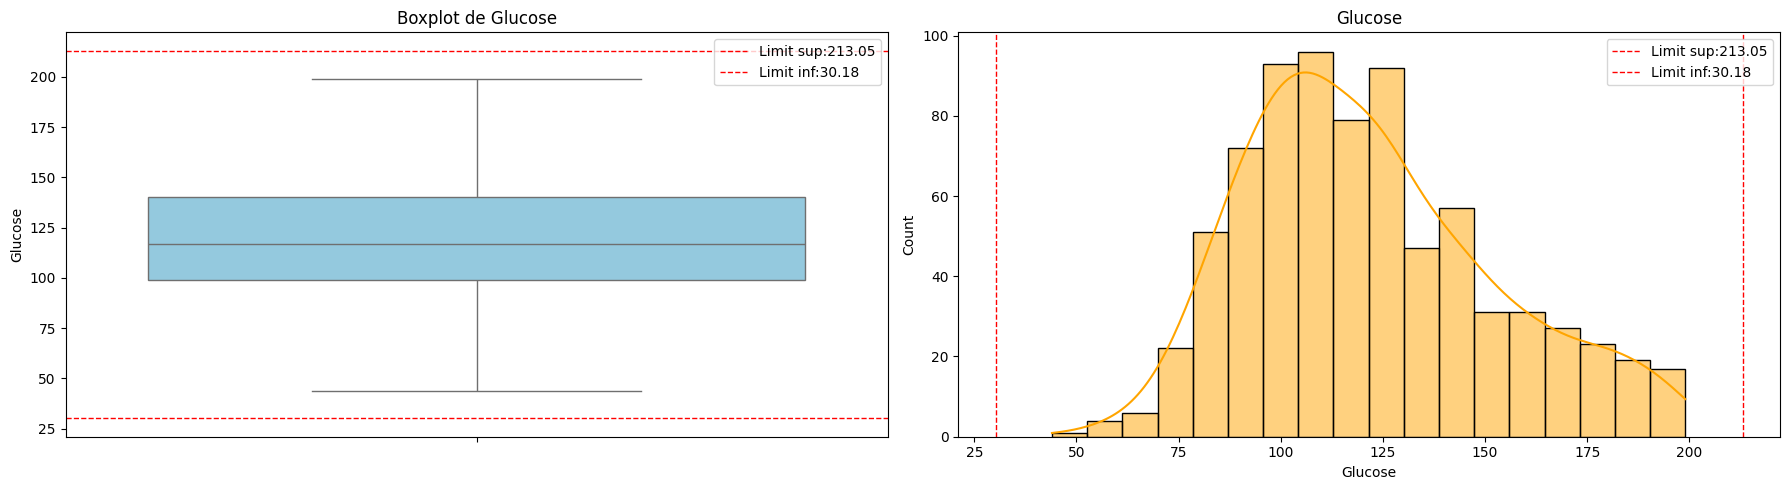

Moyenne: 72.37
Ecart-type: 12.19
Seuil Z-SCORE: 3
Nombre des outliers détectés : 8
Pourcentage f'outliers: 1.05%
Limites: [35.79, 108.95]
La distribution des BloodPressure avec les bornes sup/inf :


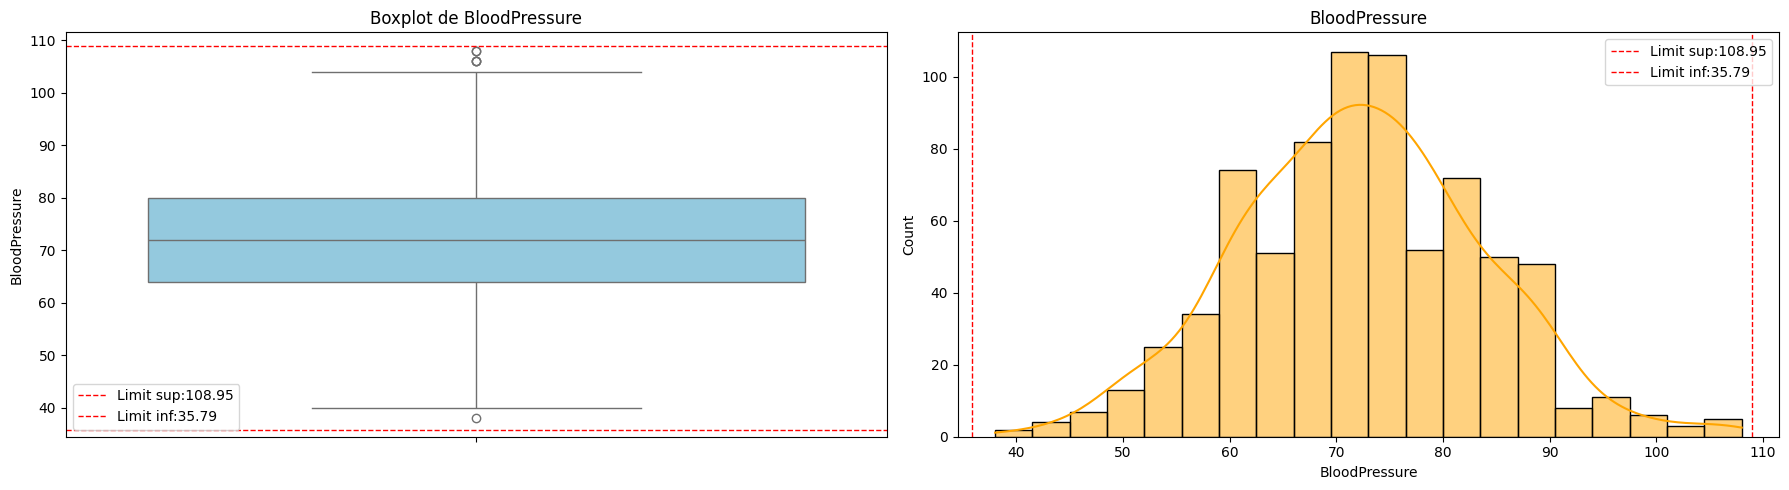

Moyenne: 29.16
Ecart-type: 9.17
Seuil Z-SCORE: 3
Nombre des outliers détectés : 3
Pourcentage f'outliers: 0.40%
Limites: [1.66, 56.67]
La distribution des SkinThickness avec les bornes sup/inf :


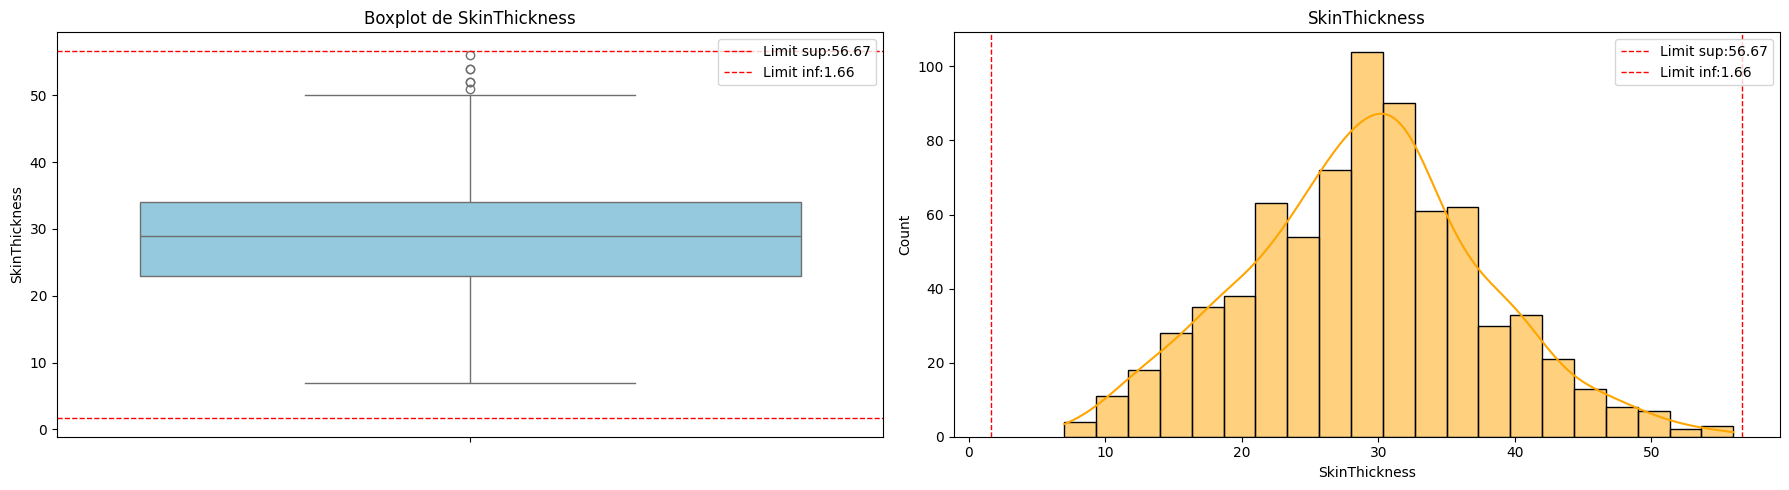

Moyenne: 4.87
Ecart-type: 0.59
Seuil Z-SCORE: 3
Nombre des outliers détectés : 5
Pourcentage f'outliers: 0.66%
Limites: [3.11, 6.64]
La distribution des Insulin avec les bornes sup/inf :


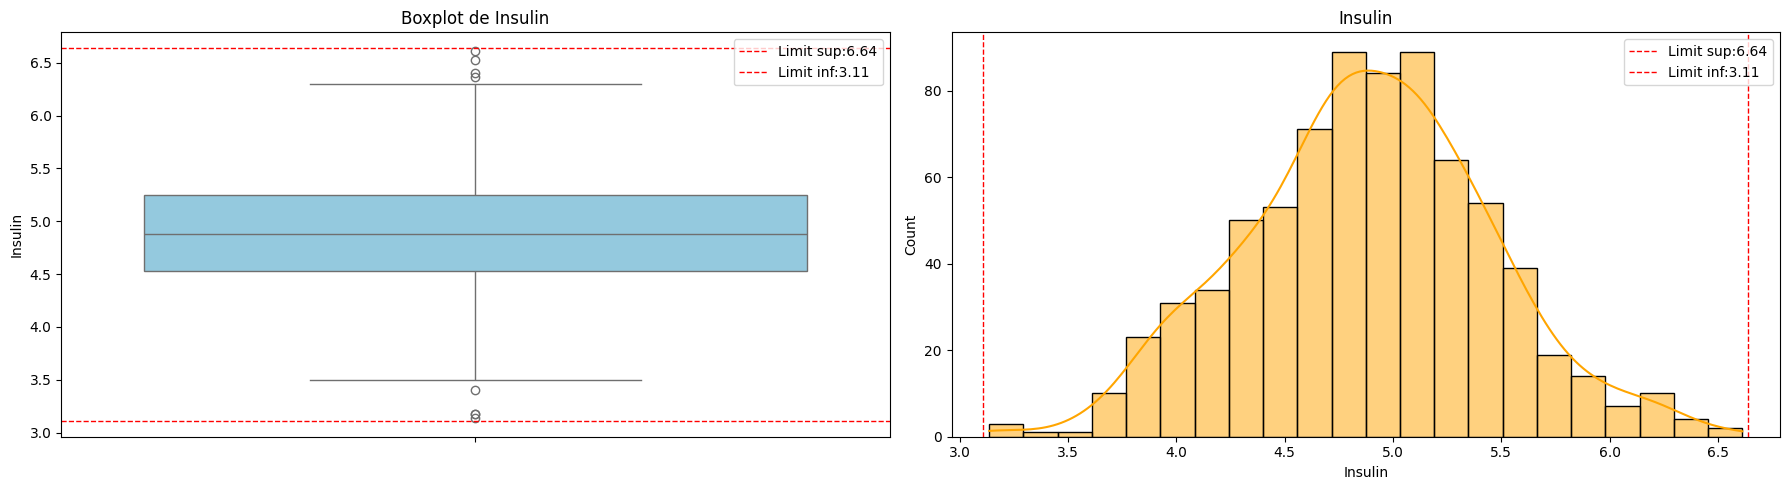

Moyenne: 32.29
Ecart-type: 6.64
Seuil Z-SCORE: 3
Nombre des outliers détectés : 5
Pourcentage f'outliers: 0.67%
Limites: [12.38, 52.20]
La distribution des BMI avec les bornes sup/inf :


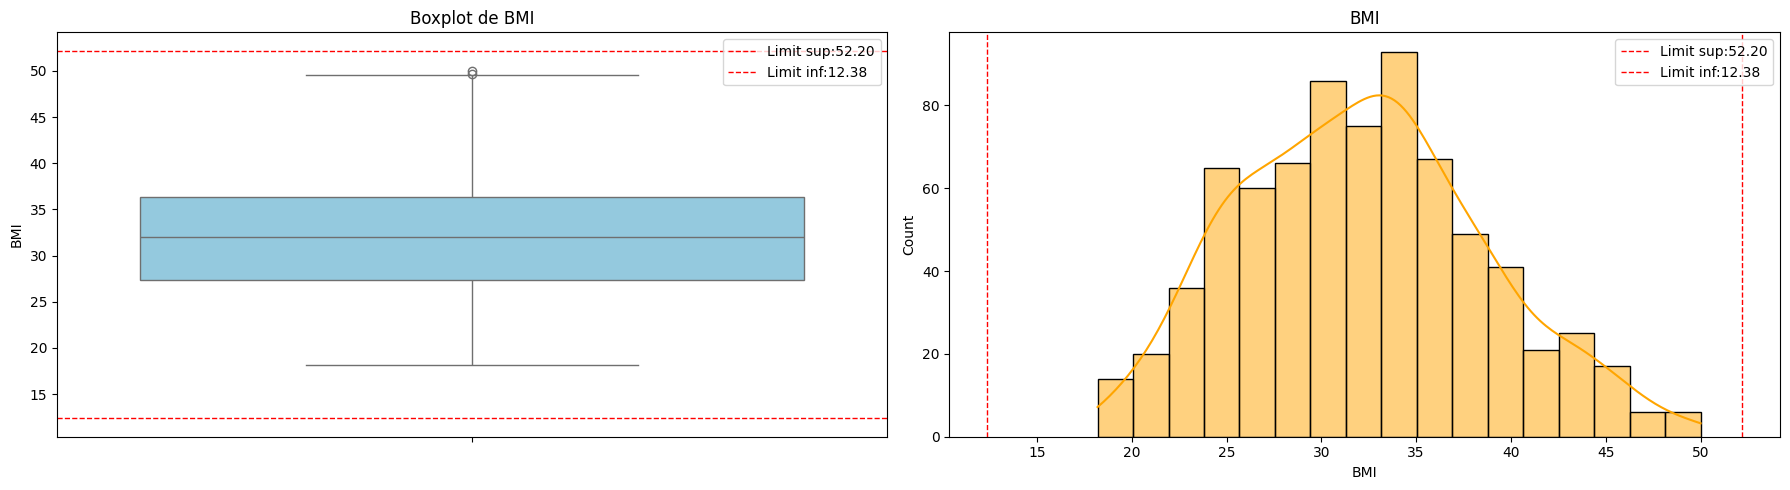

Moyenne: 0.36
Ecart-type: 0.20
Seuil Z-SCORE: 3
Nombre des outliers détectés : 9
Pourcentage f'outliers: 1.22%
Limites: [-0.23, 0.95]
La distribution des DiabetesPedigreeFunction avec les bornes sup/inf :


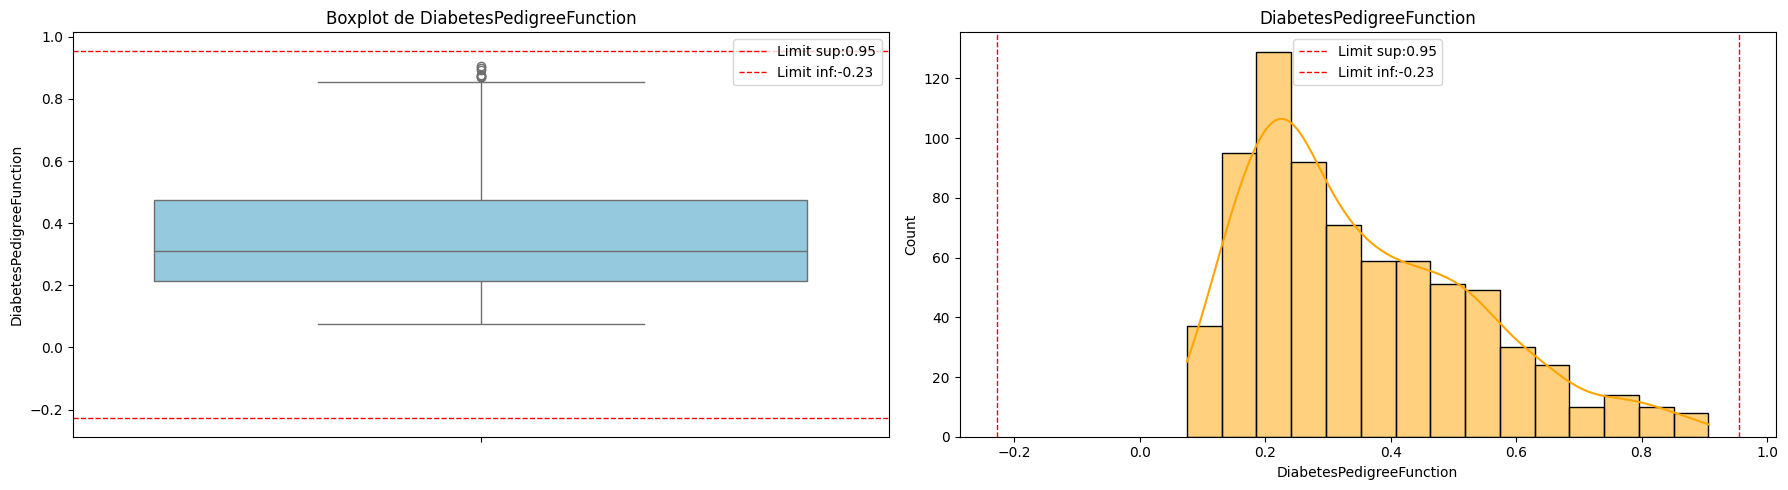

Moyenne: 33.33
Ecart-type: 11.78
Seuil Z-SCORE: 3
Nombre des outliers détectés : 5
Pourcentage f'outliers: 0.68%
Limites: [-2.01, 68.67]
La distribution des Age avec les bornes sup/inf :


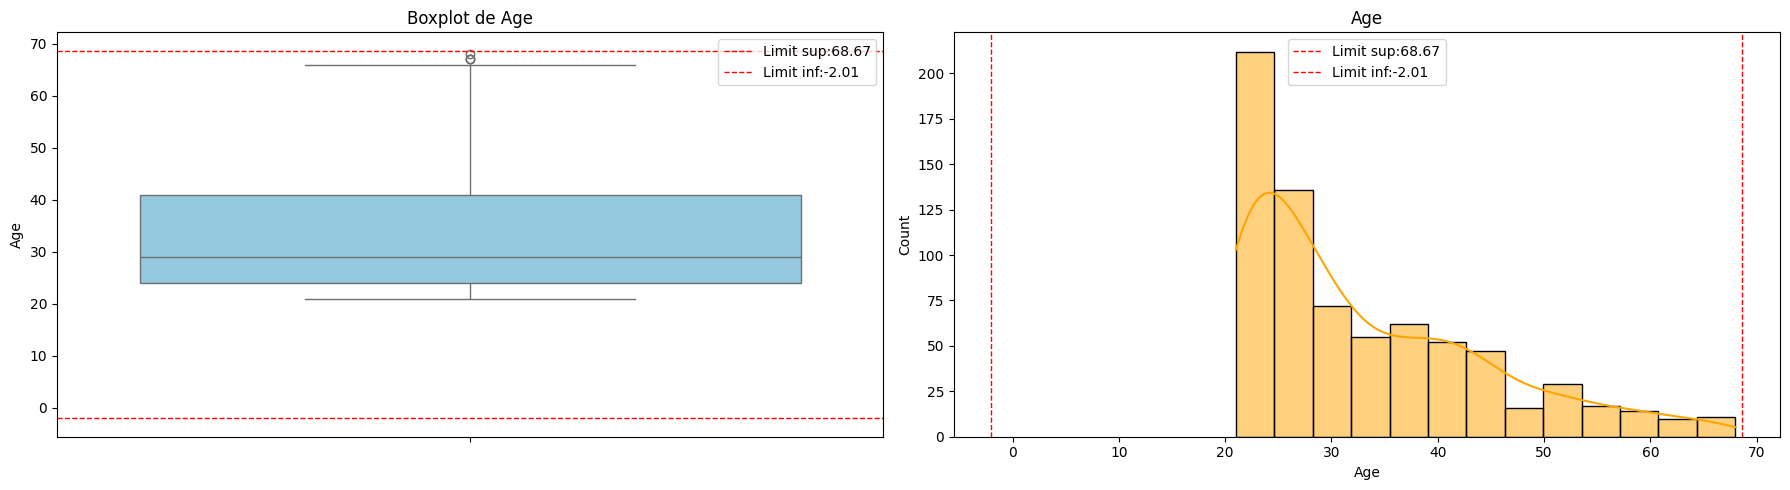

Nombre total des outliers :  35
Dataset Shape :  (733, 9)


In [13]:

df_prepare_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

total_outliers = 0

dataset_3 = df_prepare

for col in df_prepare_columns:
    dataset_3, n_outliers, outliers, inf_limit, sup_limit  = detect_remote_outliers_z_score(dataset_3, col)
    total_outliers = total_outliers + n_outliers
    
print("Nombre total des outliers : ", total_outliers)
print("Dataset Shape : ", dataset_3.shape)

### 4️⃣ Étudier les relations entre les variables.

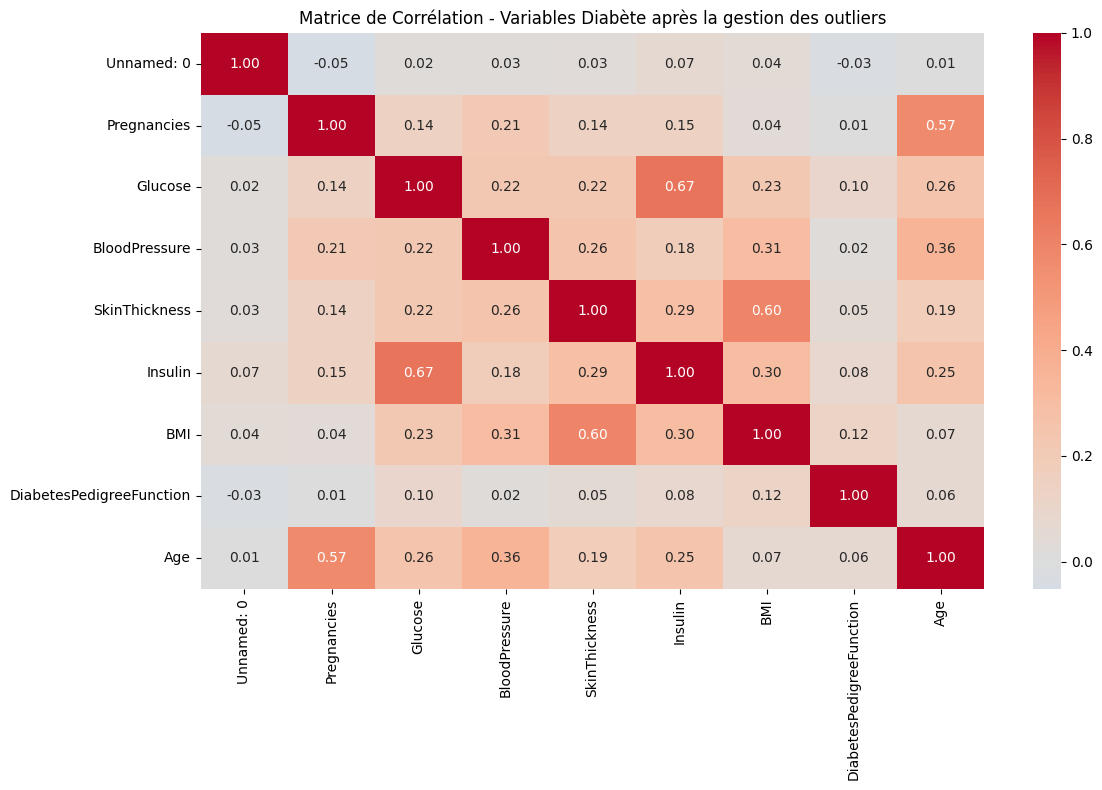

In [15]:
plt.figure(figsize=(12, 8))
sbn.heatmap(dataset_3.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matrice de Corrélation - Variables Diabète après la gestion des outliers')
plt.tight_layout()
plt.show()

<table style="border-collapse:collapse; width:100%; max-width:900px; font-family:Arial, sans-serif;">
  <thead>
    <tr style="background:#f2f2f2;">
      <th style="border:1px solid #ddd; padding:8px; text-align:left;">Variables corrélées</th>
      <th style="border:1px solid #ddd; padding:8px; text-align:center;">Coefficient r</th>
      <th style="border:1px solid #ddd; padding:8px; text-align:center;">Type de relation</th>
      <th style="border:1px solid #ddd; padding:8px; text-align:left;">Interprétation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border:1px solid #ddd; padding:8px;"><strong>Glucose – Insulin</strong></td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">0.67</td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">Forte (+)</td>
      <td style="border:1px solid #ddd; padding:8px;">Une glycémie élevée est souvent associée à une sécrétion plus forte d’insuline.</td>
    </tr>
    <tr>
      <td style="border:1px solid #ddd; padding:8px;"><strong>SkinThickness – BMI</strong></td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">0.60</td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">Forte (+)</td>
      <td style="border:1px solid #ddd; padding:8px;">Une épaisseur cutanée importante est généralement observée chez les personnes avec un IMC élevé.</td>
    </tr>
    <tr>
      <td style="border:1px solid #ddd; padding:8px;"><strong>Pregnancies – Age</strong></td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">0.57</td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">Modérée à forte (+)</td>
      <td style="border:1px solid #ddd; padding:8px;">Plus la femme est âgée, plus le nombre de grossesses est élevé.</td>
    </tr>
    <tr>
      <td style="border:1px solid #ddd; padding:8px;"><strong>BloodPressure – BMI</strong></td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">0.31</td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">Modérée (+)</td>
      <td style="border:1px solid #ddd; padding:8px;">Une tension artérielle légèrement corrélée à l’IMC (poids).</td>
    </tr>
    <tr>
      <td style="border:1px solid #ddd; padding:8px;"><strong>Glucose – BloodPressure</strong></td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">0.22</td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">Faible (+)</td>
      <td style="border:1px solid #ddd; padding:8px;">Une légère relation entre la glycémie et la pression artérielle.</td>
    </tr>
    <tr>
      <td style="border:1px solid #ddd; padding:8px;"><strong>Autres relations</strong></td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">&lt; 0.2</td>
      <td style="border:1px solid #ddd; padding:8px; text-align:center;">Faible</td>
      <td style="border:1px solid #ddd; padding:8px;">Peu de dépendance entre ces variables.</td>
    </tr>
  </tbody>
</table>


Conclusion : 

* Les corrélations fortes (r > 0.5) indiquent des relations physiologiques cohérentes.
* Aucune corrélation excessive (> 0.8), donc pas de multicolinéarité importante.
* Les variables peuvent être conservées ensemble pour la modélisation.